# Regresión lineal

## Regresión lineal simple

Modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, la variables independiente $X$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
y_i=\beta_0+\beta_1 x_i+\varepsilon_i  \quad \text{para }i=1,\dots,n
\\]

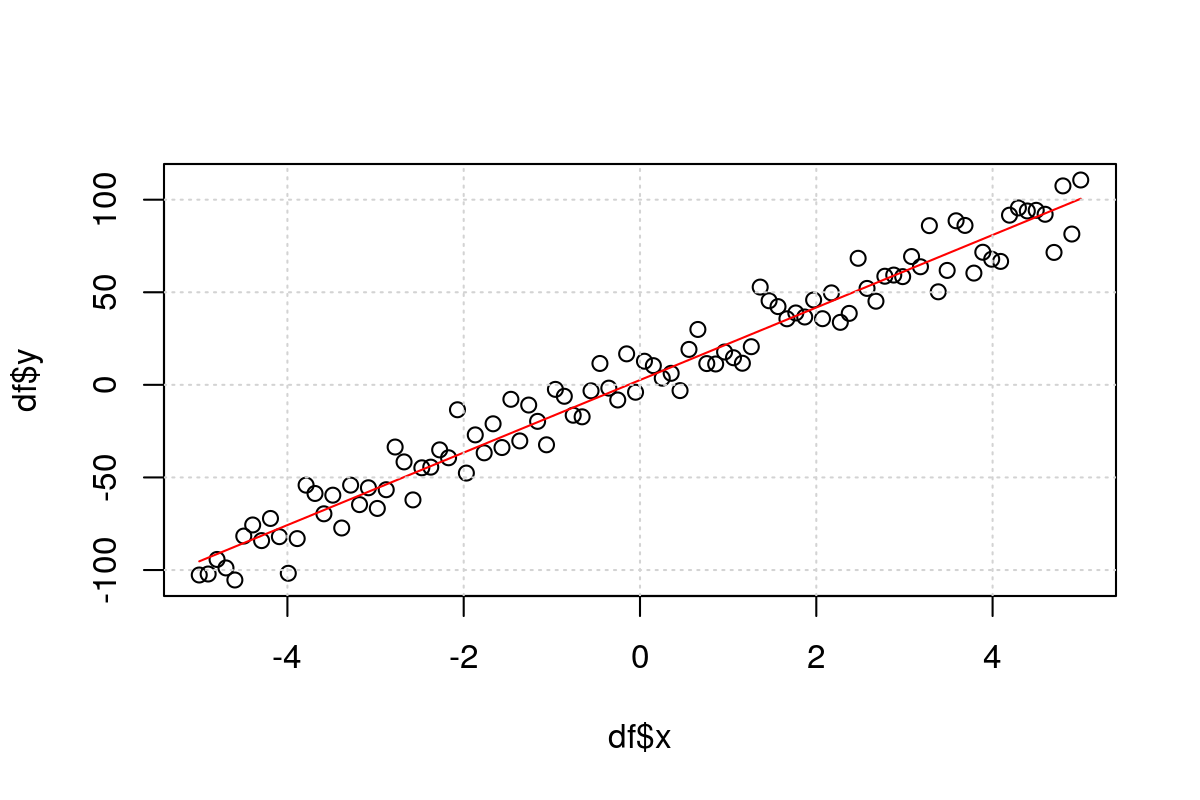

In [2]:
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)

n<-100
x<-seq(-5,5,length.out = n)
df<-data.frame(x,y = 20*x+1+rnorm(n,mean=1,sd=10))
model <- lm(y~x,data=df)
plot(df$x,df$y)
lines(df$x,predict(model,df),col="red")
grid()


Esto significa que se puede expandir de la forma:
\\[
\begin{split}
y_1 &=\beta_0+\beta_1 x_1+\varepsilon_1  \\
y_2 &=\beta_0+\beta_1 x_2+\varepsilon_2  \\
\vdots& \\
y_n&=\beta_0+\beta_1 x_n+\varepsilon_n 
\end{split}
\\]


donde:
* $y_i$: i-esimo valor de la variable dependiente
* $x_i$: i-esimo valor de la variable independiente
* $\beta_0, \beta_1$: parámetros a determinal que dado un conjunto de $x_i$ produce los mejores $y_i$
 * $\beta_0$ : Puede ser llamado sesgo, bias, intercept o término constante. Indica el corte en el eje Y
 * $\beta_1$ : Puede ser llamado pendiente, slope. Indica cuanto aumenta Y por cada incremento de X
* $\varepsilon_i$: error, valor aleatorio.

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 1 & x_1\\ 
 1 & x_2 \\ 
 \vdots & \vdots \\ 
 1 & x_n 
\end{bmatrix}
\begin{bmatrix}
\beta_0
\\ 
\beta_1
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]




Donde:
* $Y \in \mathbb{R}^{n \times 1}$ 
* $X \in \mathbb{R}^{n \times 2}$ 
* $\beta \in \mathbb{R}^{1 \times 2}$ 
* $\varepsilon \in \mathbb{R}^{n \times 1}$ 



Podemos usar la matriz inversa para resolver ecuaciones:
\\[
\begin{split}
Y &= X \beta \\
X^{-1}Y&=X^{-1}X \beta \\
X^{-1}Y&=I\beta \\
X^{-1}Y&=\beta \\
\end{split}
\\]


### Pseudoinversa Moore-Penrose

¿Qué ocurre si la matriz que queremos invertir no es cuadrada? Entonces el sistema de ecuaciones no tiene una única solución o simplemente no tiene solución.

Lo que tratamos de encontrar es la menos mala de las soluciones.

Para números reales se define como:
\\[
X^+ = \left( X^{\intercal} X  \right)^{-1} X^{\intercal}
\\]
Cuando:
\\[
X^+X = I
\\]



El problema original consistía en querer calcular $\beta$ de tal forma que se minimice la influencia de $\varepsilon$:
\\[
Y=X \beta+\varepsilon
\\]
En nuestro sistema $\varepsilon$ es desconocido, pero sabemos que tiene media cero y varianza finita. Así que  simplificamos el siguiente sistema de ecuaciones:

\\[
\begin{split}
Y=&X \hat{\beta} \\
X^+Y=& X^+X \hat{\beta} \\
X^+Y=& \hat{\beta} \\
X^+Y=& \hat{\beta} \\
\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y =& \hat{\beta}
\end{split}
\\]

Ahora tenemos, a partir de $X$ e $Y$ una estimación $\hat{\beta}$. Podemos entonces, a partir de valores conocidos de $X$ calcular una estimación de $\hat{Y}$. 
\\[
\hat{Y}=X \hat{\beta}
\\]

Evidentemente $Y \neq \hat{Y}$, llamaremos **residuo**(error) a la diferencia entre el valor real y el valor estimado : $Y-\hat{Y}$. 

El método anterior garantiza que el error cuadrático medio sea mínimo.
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]

Es decir, nuestra tarea consiste en **minimizar** la función $MSE$ para que nuestro modelo $\hat{Y}$ sea **óptimo**. La función MSE es convexa y cuadrática.

#### Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:
\\[
R^2=1-\frac{SS_{res}}{SS_t}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-\hat {y_i})^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

### Descenso por gradientes

Vamos a tratar de minimizar la función MSE con lo que hemos aprendido del descenso de gradientes:

[1] 57

[1]  2.604768 19.582192


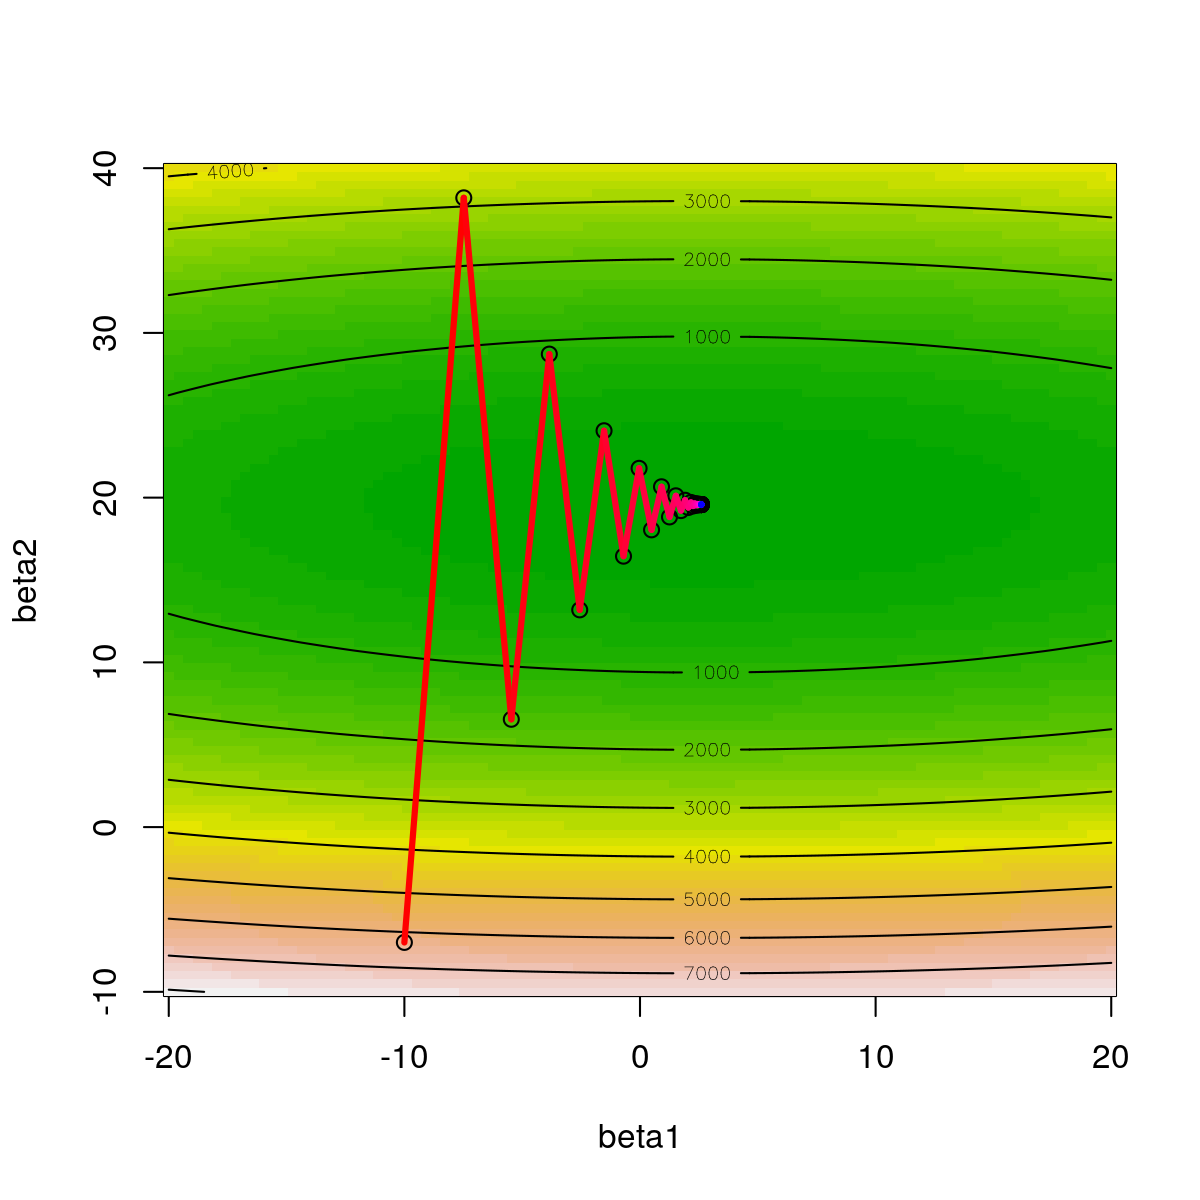

In [3]:
library(pracma)
library(plotrix)
options(repr.plot.height=6,repr.plot.width=6,repr.plot.res = 200)


mymodel<-function(x,beta1,beta2){beta1+x*beta2}

mse<-function(beta1,beta2){
    out<-rep(NA,length=length(beta1))
    for(i in 1:length(beta1)){
        out[i]<-sum((df$y-mymodel(df$x,beta1[i],beta2[i]))^2)/nrow(df)
    }
    out
}

beta1 <- seq(-20,20,length=100)
beta2 <- seq(-10,40,length=100)
z <- outer(beta1,beta2,mse)
image(beta1,beta2,z,col = terrain.colors(39))
contour(beta1,beta2,z,add=T)


myfuncVector<-function(x){ mse(x[1],x[2]) }

x_0 <- c(-10,-7)
delta <- 0.1
#delta <- 1
criterio_convergencia<-1e-4
mse_historico<-c()

x_historico<-data.frame(beta1=x_0[1],beta2=x_0[2])
for (i in 1:5000){
    g <- grad(myfuncVector,x_0)
    #g <- inv(hessian(myfuncVector,x_0)) %*% as.matrix(grad(myfuncVector,x_0),cols=1)
    if(abs(sum(g))<criterio_convergencia){
        break;
    }
    x_new <- x_0 - g*delta     
    x_0 <- x_new
    x_historico<-rbind(x_historico,data.frame(beta1=x_0[1],beta2=x_0[2]))
    mse_historico<-c(mse_historico,myfuncVector(x_0))
}
nrow(x_historico)
print(x_0)
points(x_historico$beta1,x_historico$beta2,col="black")
color.scale.lines(x_historico$beta1,x_historico$beta2,c(1,1,0),0,c(0,1,1),colvar=1:nrow(x_historico),lwd=3)


## Regresión lineal múltiple

Ahora ahora habíamos visto como encontrar como el cambio en una variable puede afectar a otra, pero ¿qué ocurre si son varias las variables que alteran el comportamiento de nuestra variable objetivo? En este caso necesitamos utilizar la regresión lineal múltiple.

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente $Y$, las variables independientes $X_i$ y un término aleatorio $\varepsilon$. Este modelo puede ser expresado como:

\\[
Y=\beta_1 X_1+\beta_2 X_2+\cdots +\beta_p X_p+\varepsilon = \sum \beta_k X_k+\varepsilon
\\]


donde:
* $Y$: variable dependiente
* $X_1,X_2,\cdots ,X_p$: variables independientes
* $\beta_0, \beta_1,\beta_2,\cdots ,\beta_p$: parámetros a determinal que dado un $X_k$ produce el mejor posible $Y$
* $\varepsilon$: error, valor aleatorio.

Condiciones para aplicarlo:
1. Que la relación entre las variables sea lineal.
2. Que los errores en la medición de $X_k$ sean independientes entre sí.
3. Que los errores sigan una distribución normal de media 0 y varianza constante
4. Que la varianza sea constante, se cumple heterocedasticidad


Para calcular el valor óptimo de $\beta$ vamos a utilizar un poco de álgebra linea. 
\\[
\begin{split}
y_1 &=\beta_1 x_{11}+\beta_2 x_{12}+\beta_3 x_{13}+\cdots+\beta_p x_{1p}+\varepsilon_1  \\
y_2 &=\beta_1 x_{21}+\beta_2 x_{22}+\beta_3 x_{23}+\cdots+\beta_p x_{2p}+\varepsilon_1  \\
\vdots& \\
y_n &=\beta_1 x_{n1}+\beta_2 x_{n2}+\beta_3 x_{n3}+\cdots+\beta_p x_{np}+\varepsilon_1  \\
\end{split}
\\]

Podemos escribirlo en forma de matriz:
\\[
\begin{bmatrix}
 y_1 \\ 
 y_2 \\ 
 \vdots \\ 
 y_n 
\end{bmatrix}
=
\begin{bmatrix}
 x_{11} & x_{12} & x_{13} & \cdots & x_{1p} \\ 
 x_{21} & x_{22} & x_{23} & \cdots & x_{2p} \\ 
 \vdots & & & \ddots & \vdots \\ 
 x_{n1} & x_{n2} & x_{n3} & \cdots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ 
\beta_2 \\
\beta_3 \\
\vdots  \\
\beta_p
\end{bmatrix}+
\begin{bmatrix}
 \varepsilon_1 \\ 
 \varepsilon_2 \\ 
 \vdots \\ 
 \varepsilon_n
\end{bmatrix}
\\]
Lo que se puede simplificar como:
\\[
Y=X \beta+\varepsilon
\\]

Al igual que en el caso anterior podemos estimar $\beta$ con:
\\[
\beta=\left( X^{\intercal}X  \right)^{-1} X^{\intercal} Y
\\]

(Intercept) poly(x, 3)1 poly(x, 3)2 poly(x, 3)3 
   48.92759   790.71518   507.39881   747.54829

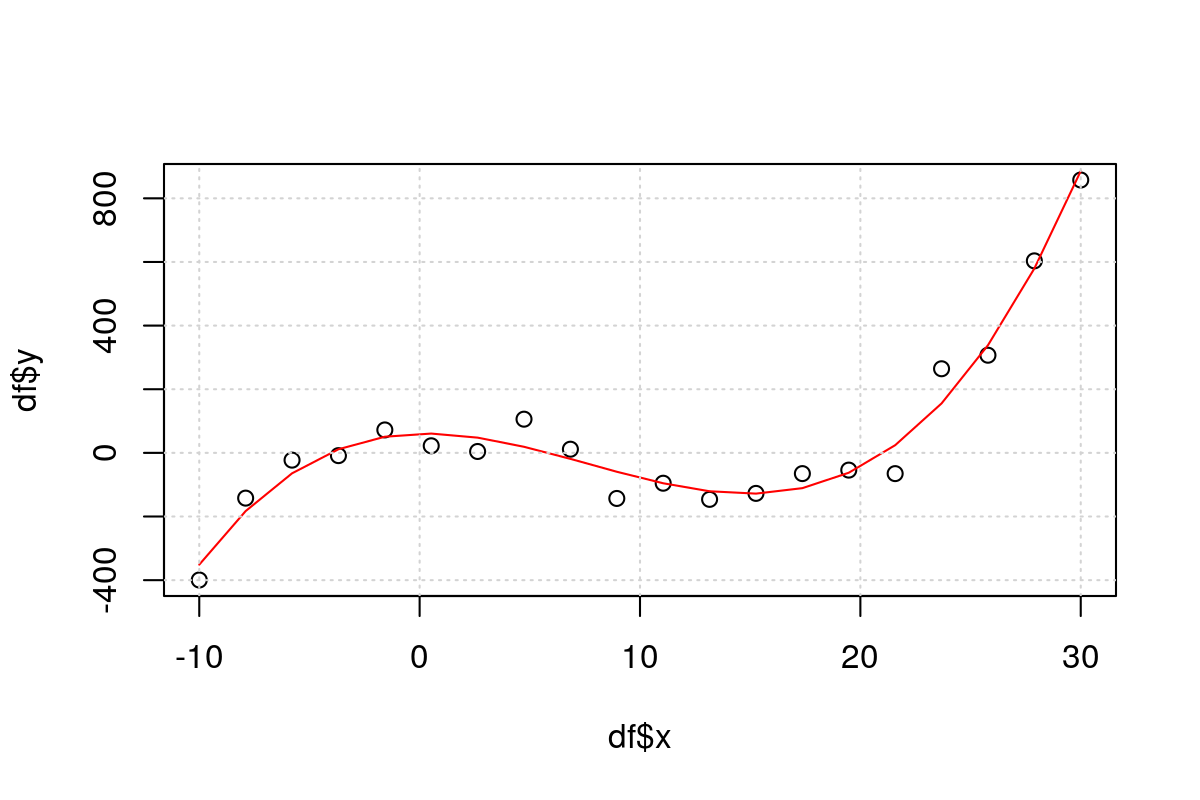

In [3]:
n<-20
x<-seq(-10,30,length.out = n)
df<-data.frame(x,y = x-3*x-2*x^2+0.1*x^3+1+rnorm(n,mean=1,sd=80))
model <- lm(y~poly(x,3),data=df)
model$coef
options(repr.plot.height=4,repr.plot.width=6)

plot(df$x,df$y)
lines(df$x,predict(model,df),col="red")
grid()

Esta fórmula nos garantiza que el error (residuo) cuadrático medio sea mínimo:
\\[
MSE = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}
\\]

Es decir, nuestra tarea consiste en **minimizar** la **función de coste** ($MSE$) para que nuestro modelo $\hat{Y}$ sea **óptimo**.





## Coeficiente de determinación $R^2$


Proporciona una medida de como de bien nuestra medida sigue al modelo. Se calcula mediante:

\\[
R^2=1-\frac{SS_{res}}{SS_{tot}}
\\]

Donde $SS_{res}$ es la suma del cuadrado de los residuos:
\\[
SS_{res}=\sum_i (y_i-y_i')^2
\\]

y $SS_{tot}$ es proporcional a la varianza de $Y$:

\\[
SS_{tot}=\sum_i (y_i-\bar{y})^2
\\]

Cuanto más cercano a $1$ mejor seguirá la predicción a los datos reales.

In [16]:
myrsquared<-function(Y,est_Y){
    Rsq <- 1-(sum((Y-est_Y)^2))/(sum((Y-mean(Y))^2))
    return(Rsq)
}

## Generalización

La habilidad de obtener un resultado en datos no observados se llama **generalización**.

El objetivo en estadística era encontrar un modelo que mejor encajara con los datos observados, era un problema de optimización pura. En *Data Mining* queremos un modelo para hacer predicciones, eso significa que necesitamos un modelo que funcione lo mejor posible con **datos que no hemos observado nunca**.

Es por ello que los datos se dividen en como mínimo dos grupos:
* Datos de **entrenamiento**: Son los datos con los que entrenaremos nuestro modelo.
* Datos de **test**: Son los datos con los que comprobaremos la calidad de nuestro modelo. Son datos que el modelo no ha visto nunca.

Veamos un ejemplo, supongamos que tenemos los siguientes datos

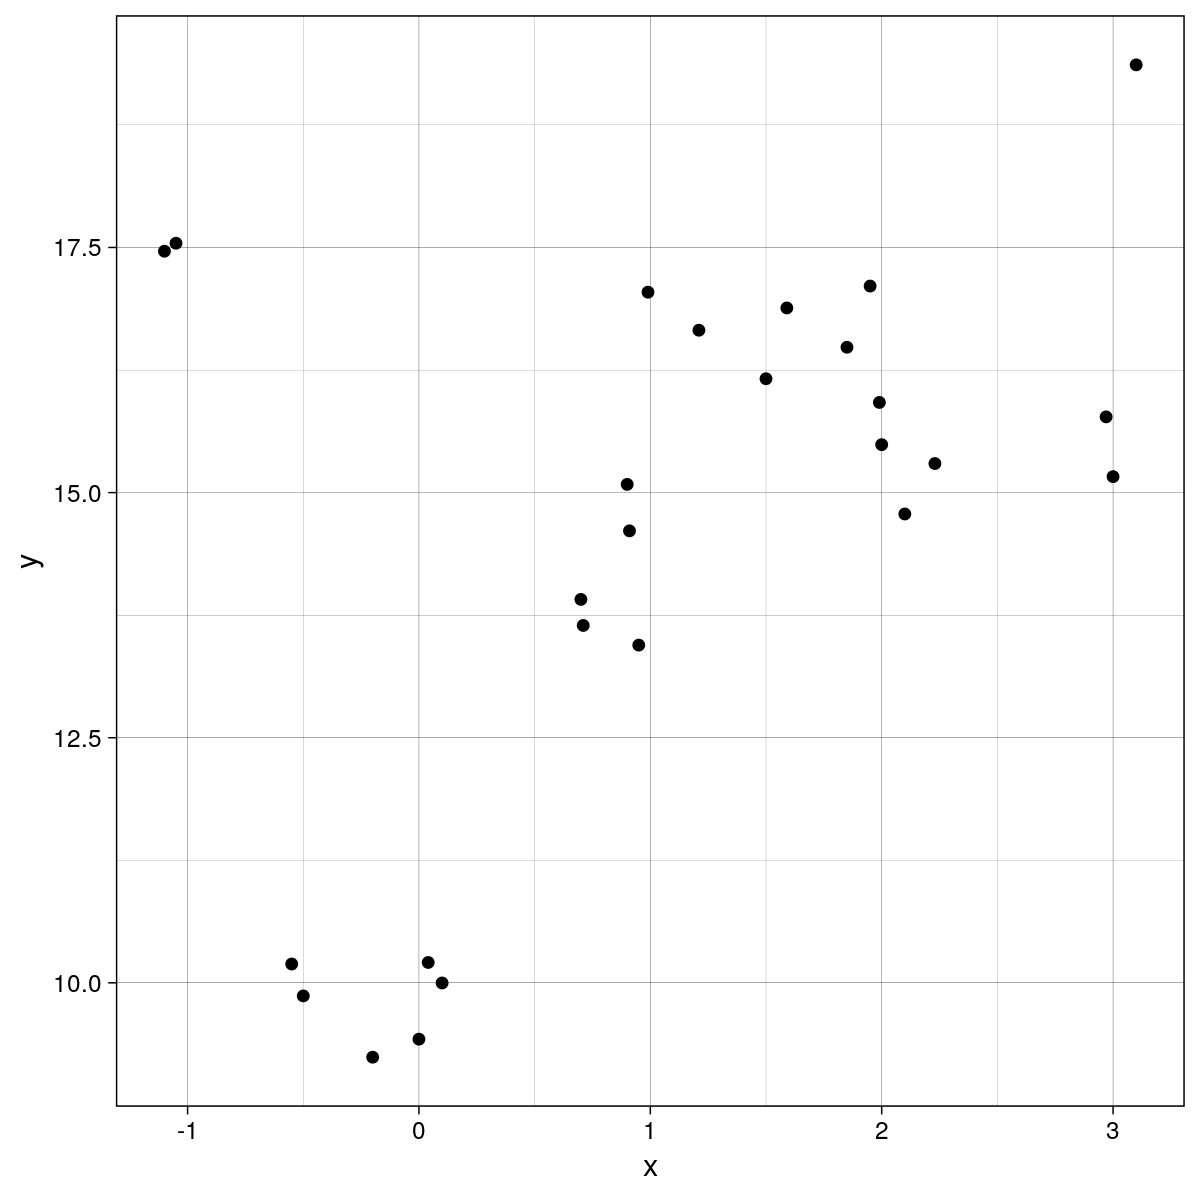

In [5]:
library(ggplot2)
x<-c(-1.1,-1.05,0.99,0.95,-0.5,-0.55,0,0.1,0.7,0.71,0.9,0.91,1.5,1.85,1.95,1.99,2,2.1,3,3.1,-0.20,0.04,1.21,1.59,2.23,2.97)
y<-c(17.462034,17.543560,17.044042,13.444434,9.866625,10.191937,9.425260,9.998468,13.910648,13.645024,15.083907,14.610008,16.161246,16.482340,17.106625,15.919612,15.488990,14.781905,15.162828,19.362935,9.24160,10.20768,16.65628,16.88339,15.29640,15.77241)
data.df<-data.frame(x,y)
ggplot(data.df,aes(x=x,y=y))+geom_point()+theme_linedraw()

Queremos hacer un modelo que dado un valor de X, me de el valor más cercano de Y. Podemos probar con modelos más o menos complejos, con distinto grado:

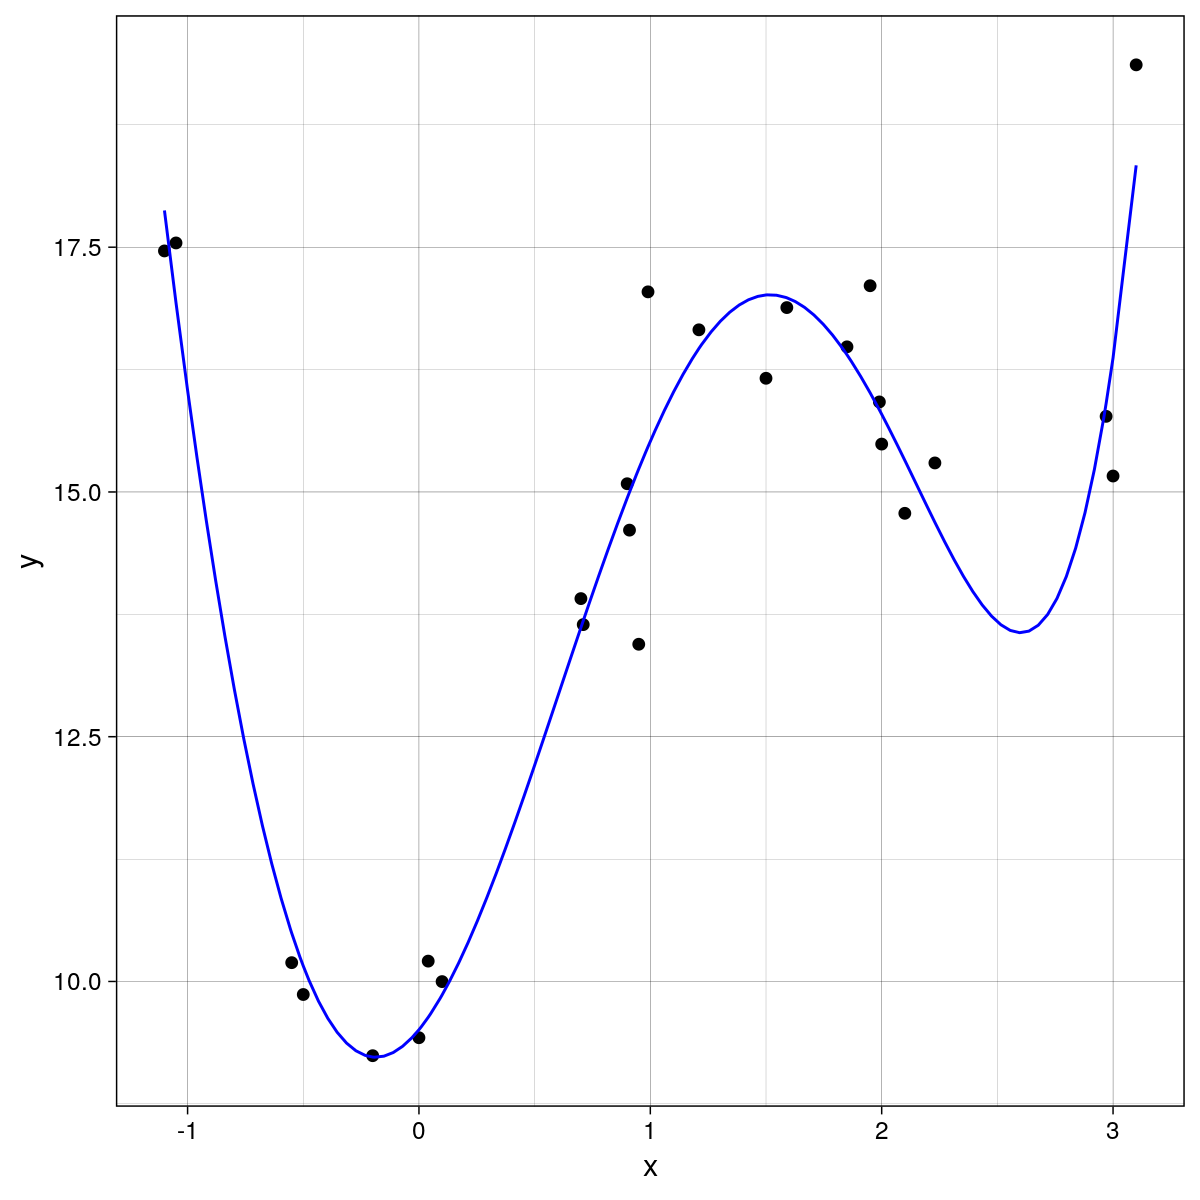

In [8]:
model<-lm(y~poly(x,5),data=data.df)
new.data.df<-data.frame(x=c(data.df$x,seq(-1,3,length.out=100)),y=NA,yp=NA)
new.data.df$yp<-predict(model,new.data.df)

data.df$yp<-predict(model,data.df)

new.data.df<-rbind(new.data.df,data.df)
ggplot(new.data.df,aes(x=x,y=y))+geom_point(na.rm=TRUE)+geom_line(aes(y=yp),color="blue")+theme_linedraw()


Cual de todos los modelos es el mejor? Acordaros que buscamos generalización, queremos que el modelo se comporte lo mejor posible con datos que no ha visto. 
Por ello dividimos nuestros datos entre test y training. Una buena prácita consiste en usar un 70%-80% para entrenamiento y el resto para tests. 
En este caso podemos por ejemplo coger 20 muestras para entrenamiento y el resto para test

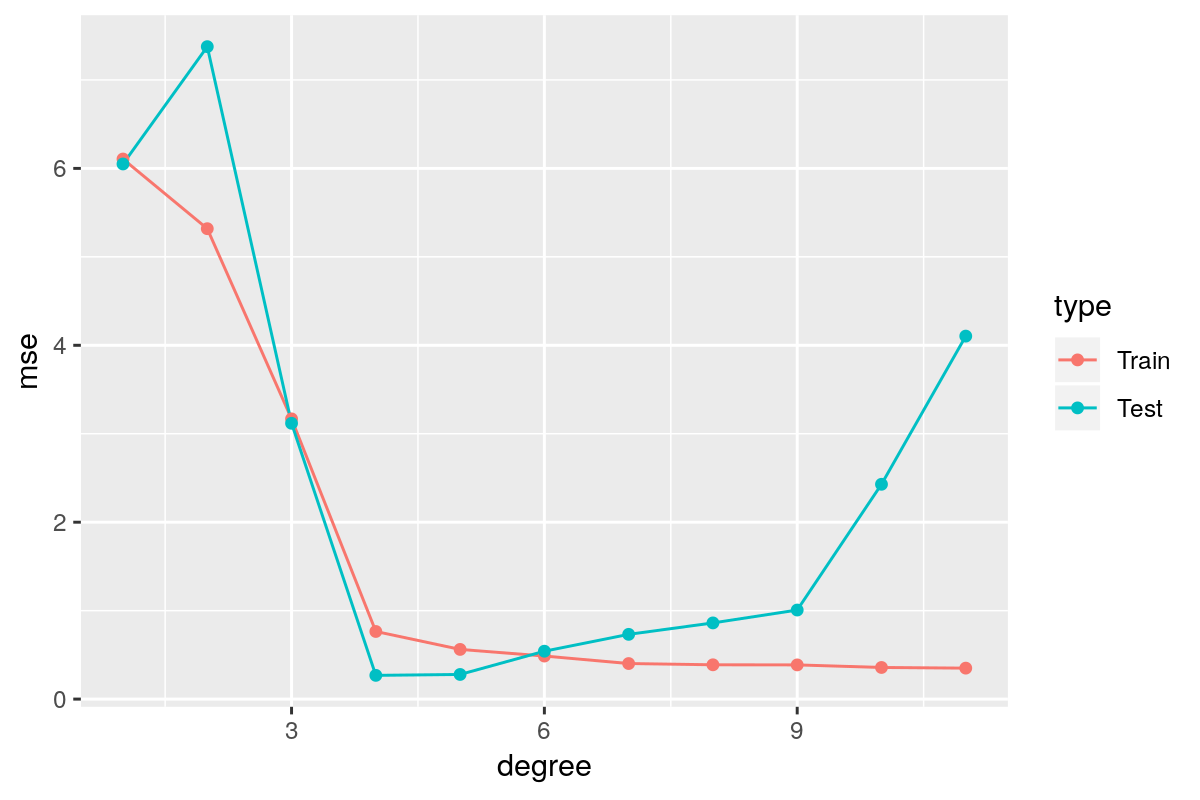

In [9]:
calcmse<-function(y_real,y_est){
  sum((y_real-y_est)^2)/length(y_real)
}

idx<-1:20
train.df<-data.df[idx,c("x","y")]
test.df<-data.df[-idx,c("x","y")]

mse_train<-c()
mse_test<-c()
for (i in 1:11){
  model<-glm(formula=y~poly(x,i),data=train.df)
  yp_train<-predict(model,train.df)
  mse_train[i]<-calcmse(train.df$y,yp_train)
  
  yp_test<-predict(model,test.df)
  mse_test[i] <-calcmse(test.df$y,yp_test)
}
mse.df<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df<-rbind(mse.df,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))
ggplot(mse.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()


Si un modelo es demasiado simple tanto el error de test como de entrenamiento será alto.

A medida que el modelo es más complejo el error disminuye.

Si el modelo es demasiado complejo ocurre el **sobreajuste** el modelo aprende sobre el ruido de nuestro modelo de entrenamiento y no es capaz de  generalizar bien.
Para evitar el sobreajuste(overfitting) se puede recurrir a simplificar el modelo o a poner limitaciones sobre el mismo. Esto se conoce con el nombre de regularización.
* Regularización Ridge o $L^2$: se evita que los parámetros crezcan demasiado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j \beta^2
\\]
* Regularización Lasso o $L$: permite seleccionar los parámetros que más afectan al resultado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j | \beta |
\\]




### Prediciendo la potencia de generación de una central de ciclo combinado

El conjunto de datos contiene 9568 puntos de datos recopilados de una Central de Ciclo Combinado durante 6 años (2006-2011), cuando la planta de energía se puso a funcionar con carga completa. Las características consisten en variables ambientales promedio por hora, Temperatura (T), Presión ambiente (AP), Humedad relativa (HR) y Vacío de escape (V) para predecir la producción neta de energía eléctrica por hora (EP) de la planta.

Las características consisten en variables ambientales promedio por hora
- Temperatura (AT) en el rango de 1.81 ° C y 37.11 ° C,
- Presión ambiental (AP) en el rango de 992.89-1033.30 milibares,
- Humedad relativa (HR) en el rango de 25.56% a 100.16%
- Vacío de escape (V) en el rango de 25.36-81.56 cm Hg
- Producción neta de energía eléctrica por hora (EP) 420.26-495.76 MW

Los promedios se toman de varios sensores ubicados alrededor de la planta que registran las variables ambientales cada segundo. Las variables se dan sin normalización.


https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

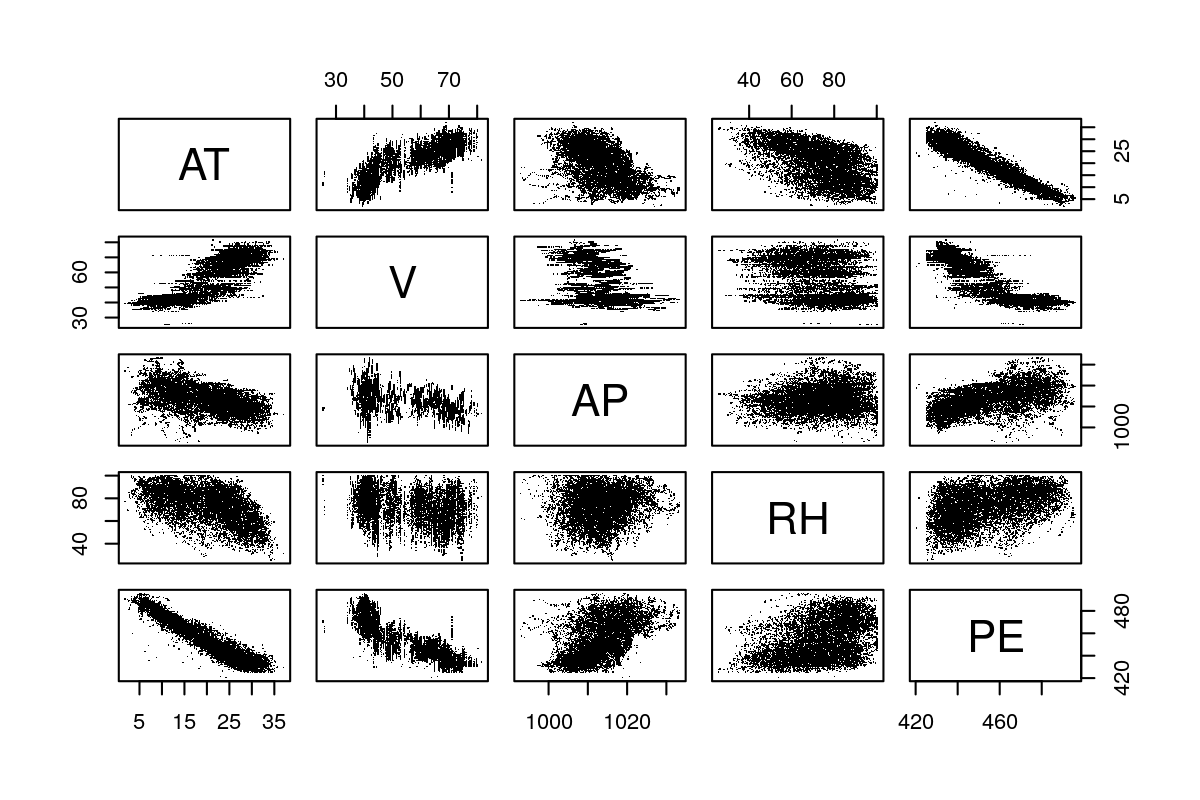

In [10]:
powerplant<-read.csv("data/powerplant.csv")

options(repr.plot.height=4,repr.plot.width=6)
plot(powerplant,pch='.')

In [11]:
library(GGally)
ggpairs(powerplant, 
        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



ERROR: Error in ggpairs(powerplant, lower = list(continuous = wrap("density", : object 'powerplant' not found


In [12]:
set.seed(1234)
idx<-sample(1:nrow(powerplant),nrow(powerplant)*0.7)
powerplant.train<-powerplant[idx,]
powerplant.test <-powerplant[-idx,]
model_powerplant<-lm(PE~.,data=powerplant.train)
summary(model_powerplant)


Call:
lm(formula = PE ~ ., data = powerplant.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.137  -3.156  -0.113   3.157  17.779 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 460.637694  11.478325   40.13  < 2e-16 ***
AT           -1.989762   0.017809 -111.73  < 2e-16 ***
V            -0.228784   0.008538  -26.80  < 2e-16 ***
AP            0.055926   0.011140    5.02 5.29e-07 ***
RH           -0.155907   0.004884  -31.92  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.499 on 6692 degrees of freedom
Multiple R-squared:  0.9308,	Adjusted R-squared:  0.9308 
F-statistic: 2.252e+04 on 4 and 6692 DF,  p-value: < 2.2e-16


[1] 4.497384

[1] 0.9308337

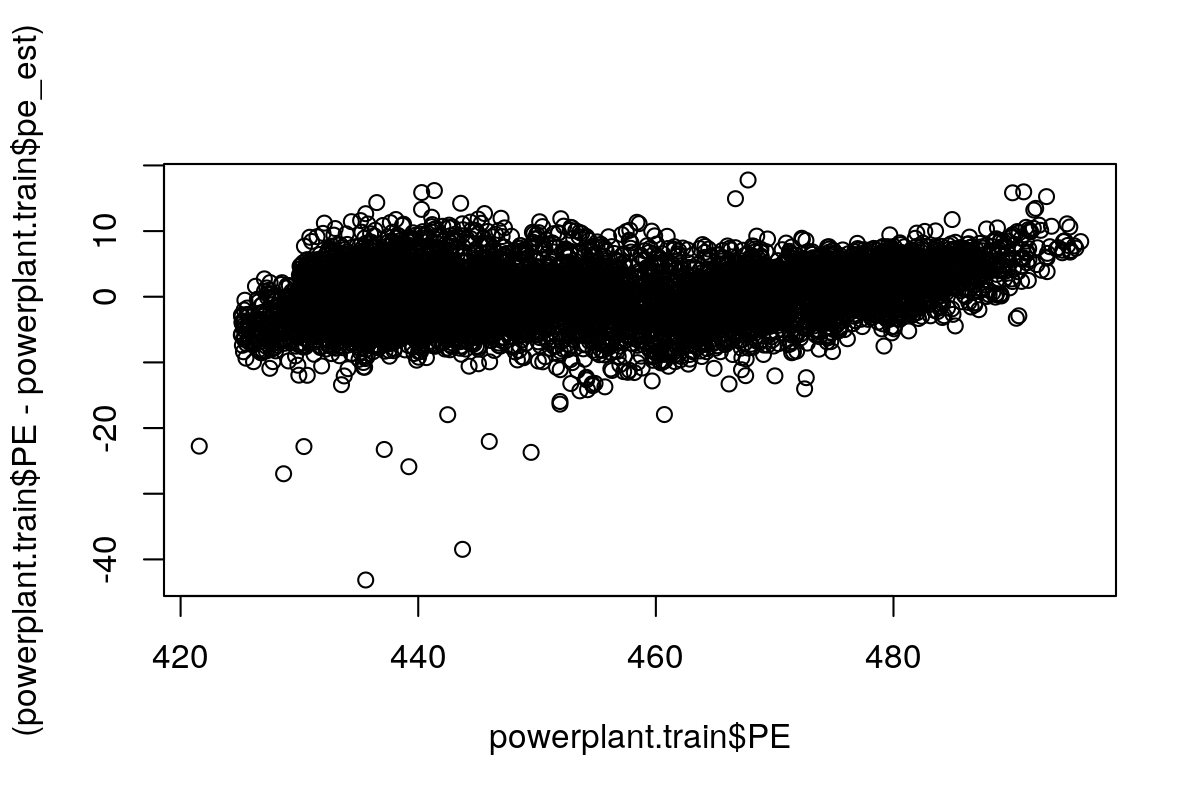

In [17]:
powerplant.train$pe_est<-predict(model_powerplant,powerplant.train)
#plot(powerplant.train$PE,(powerplant.train$PE-powerplant.train$pe_est)^2)
plot(powerplant.train$PE,(powerplant.train$PE-powerplant.train$pe_est))
sqrt(mean((powerplant.train$PE-powerplant.train$pe_est)^2))
myrsquared(powerplant.train$PE,powerplant.train$pe_est)

En la gráfica anterior observamos que la varianza de los residuos es constante a lo largo de todo el rango predicho.
En la siguiente podemos ver como los residuos siguen una distribución normal.

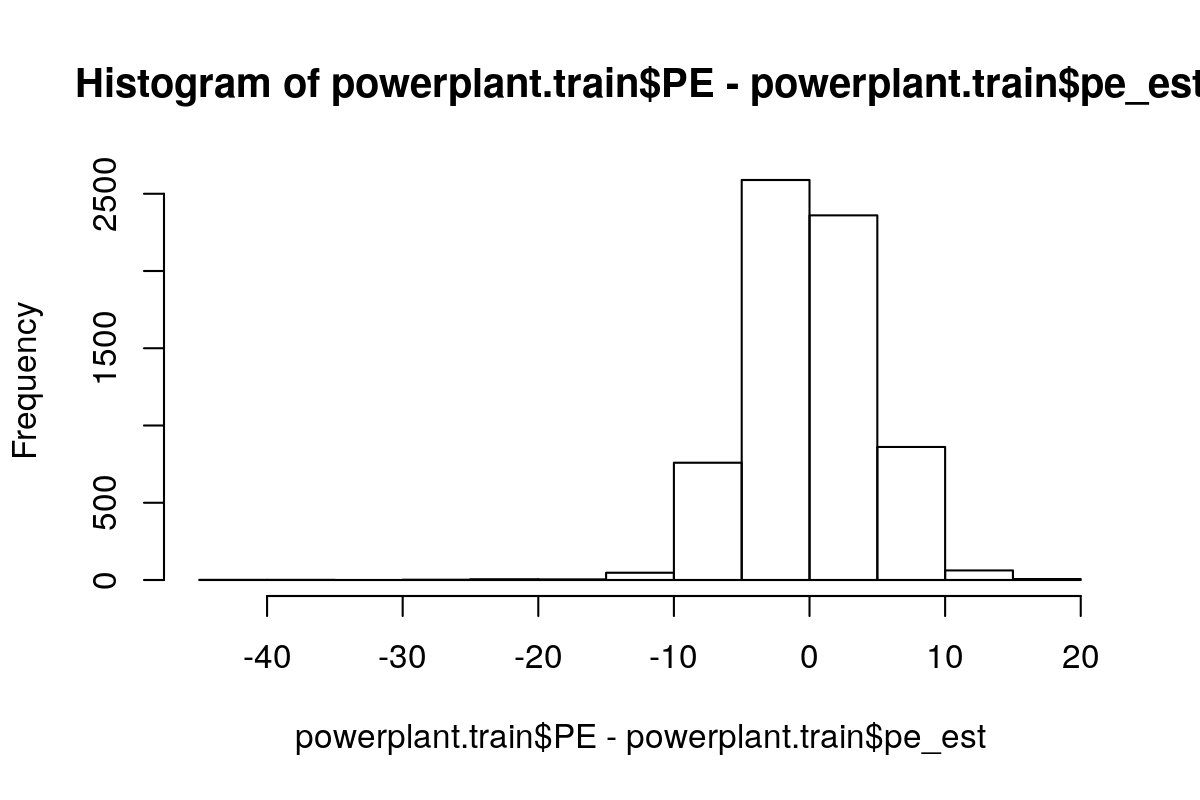

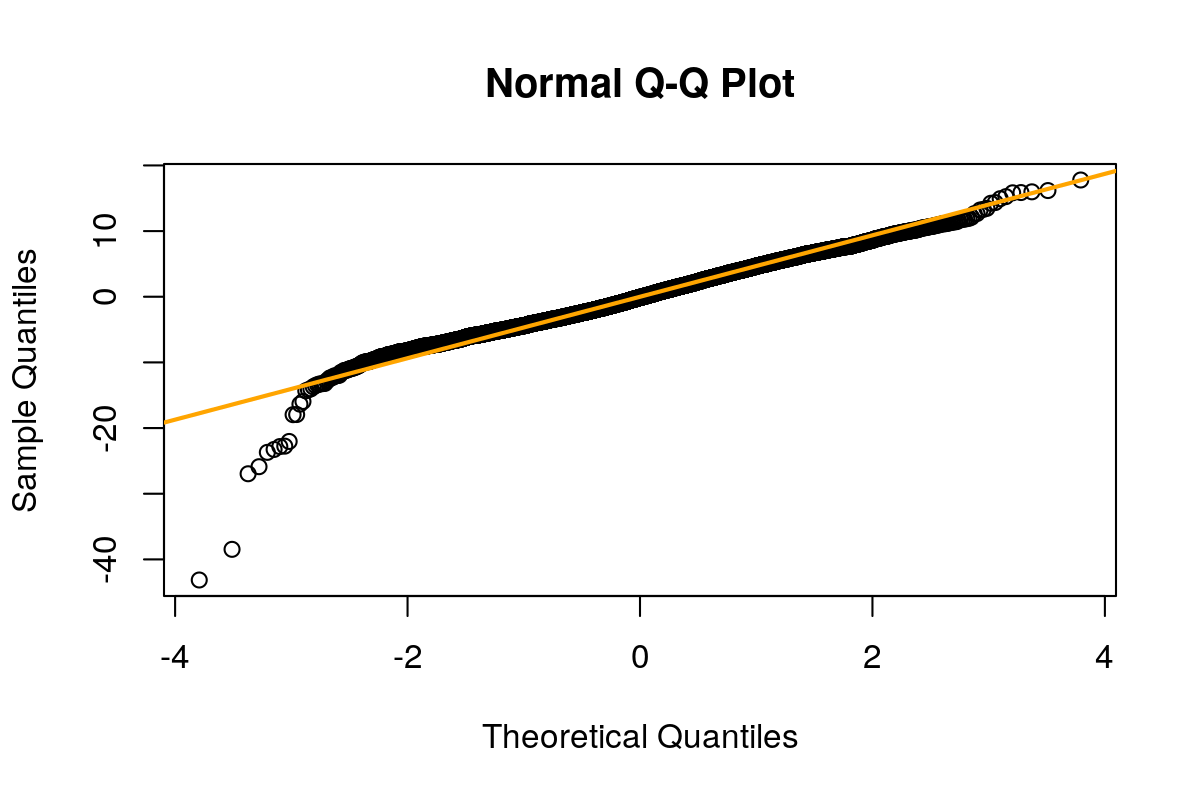

In [14]:
hist(powerplant.train$PE-powerplant.train$pe_est,20)
qqnorm(powerplant.train$PE-powerplant.train$pe_est)
qqline(powerplant.train$PE-powerplant.train$pe_est, col = 'orange', lwd =2)

Analicemos ahora el conjunto de test

[1] 4.695398

[1] 0.9235435

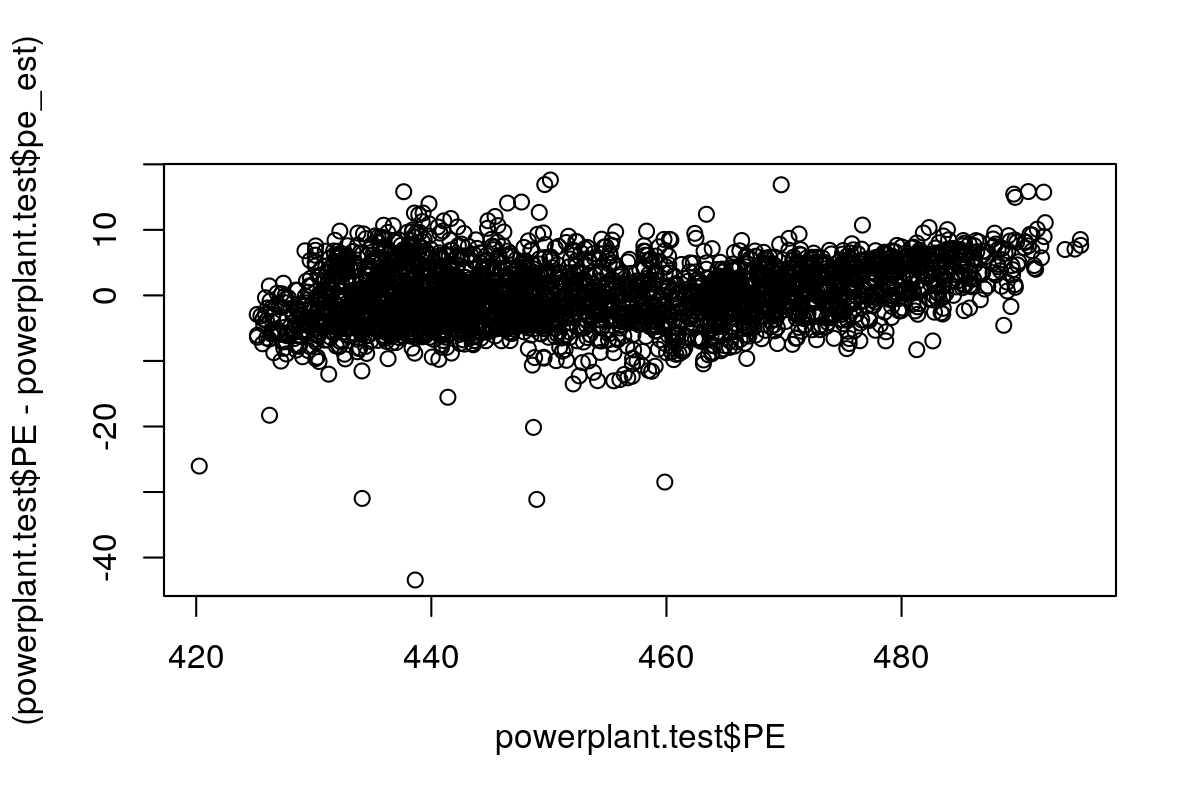

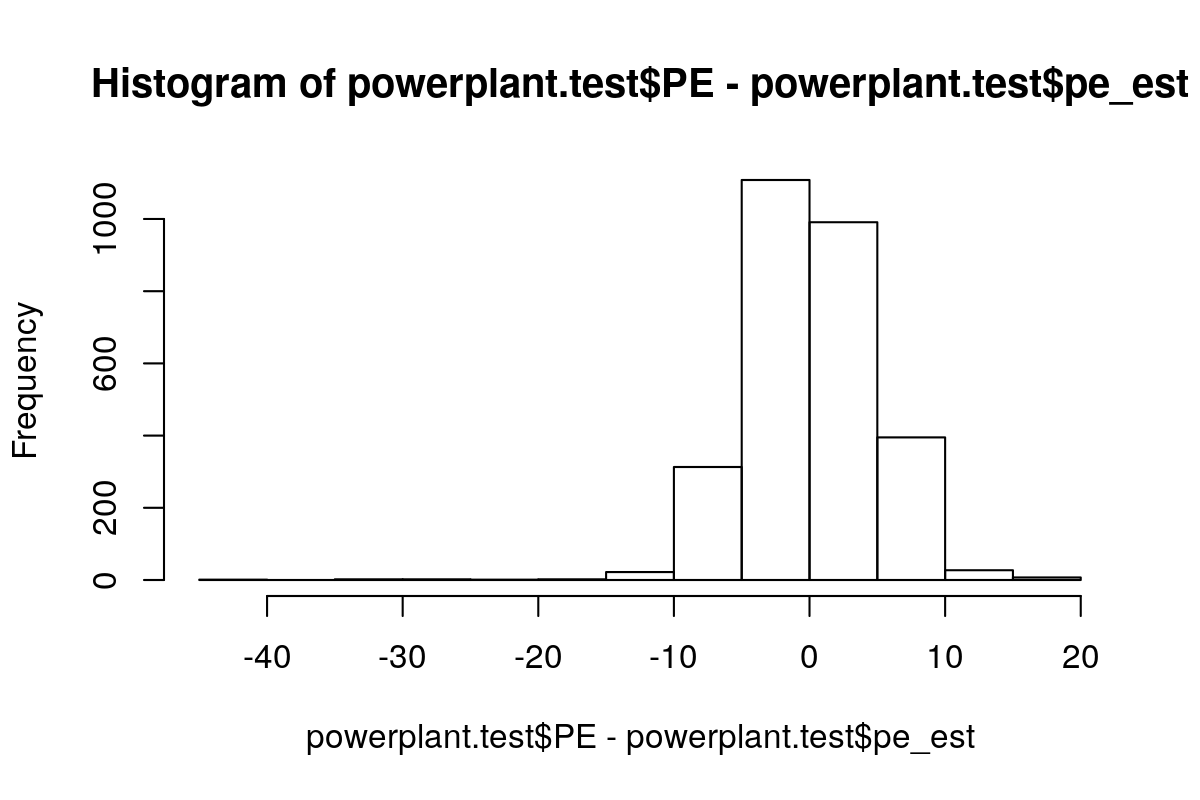

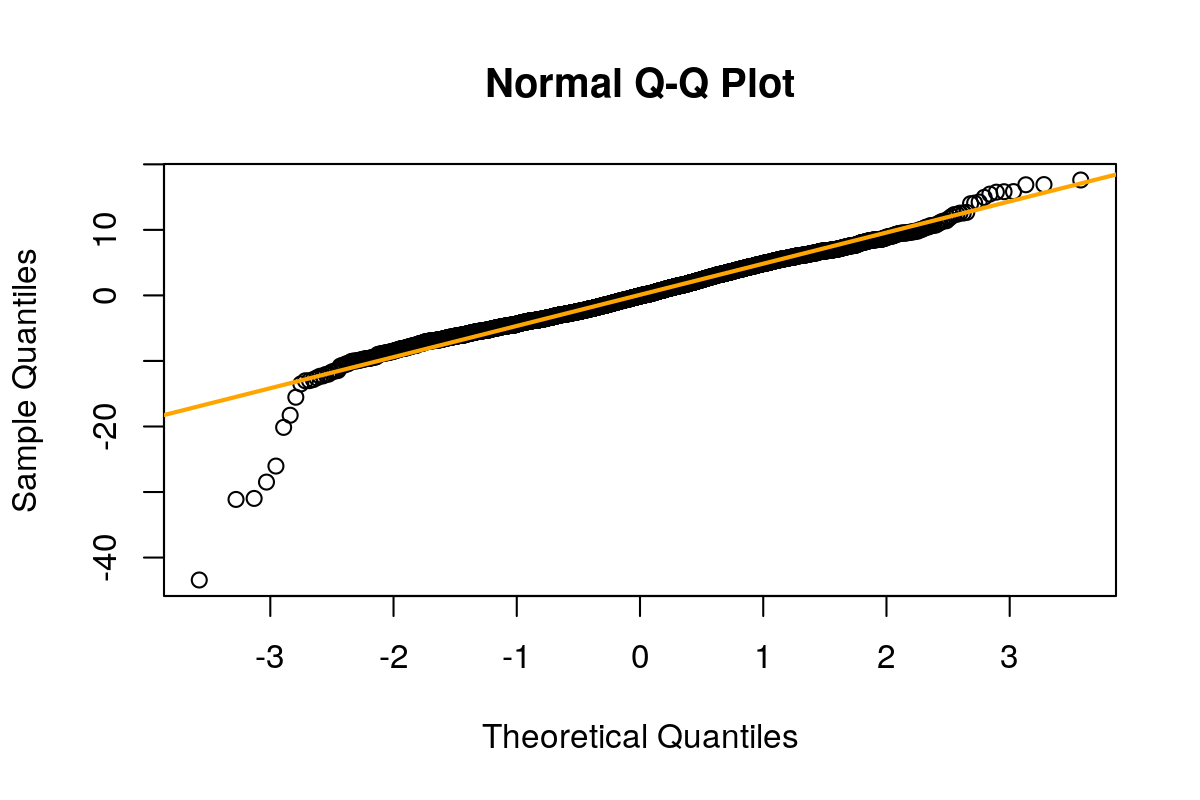

In [18]:
powerplant.test$pe_est<-predict(model_powerplant,powerplant.test)
plot(powerplant.test$PE,(powerplant.test$PE-powerplant.test$pe_est))
sqrt(mean((powerplant.test$PE-powerplant.test$pe_est)^2))
myrsquared(powerplant.test$PE,powerplant.test$pe_est)
hist(powerplant.test$PE-powerplant.test$pe_est,20)
qqnorm(powerplant.test$PE-powerplant.test$pe_est)
qqline(powerplant.test$PE-powerplant.test$pe_est, col = 'orange', lwd =2)

### Distancia Cooks

La distancia de Cooks nos sirve para detectar outliers, valores cuyo valor influye mucho en la salida de la regresión lineal.

Se calcula mirando la diferencia entre el modelo completo con todas las muestras menos el modelo generado eliminando la muestra bajo estudio. La distancia de cook para la muestra $i$ se puede calcular como:
\\[
D_i \frac{\sum_{j=1}^N (\hat Y_j - \hat Y_{j(i)})^2}{(p+1)·\hat \sigma ^2}
\\]

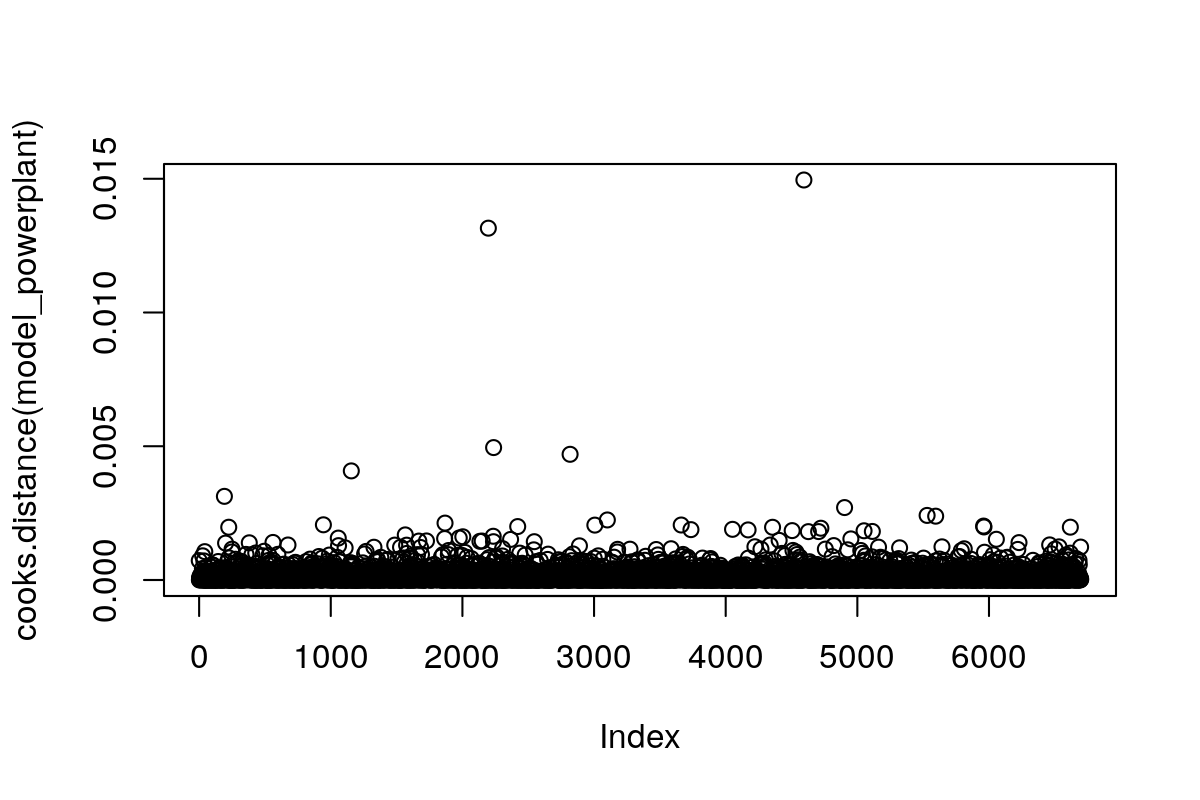

In [19]:
plot(cooks.distance(model_powerplant))

In [20]:
powerplant.train_clean<-powerplant.train[cooks.distance(model_powerplant)<0.005,]
model_powerplant_clean<-lm(PE~AT+V+AP+RH,data=powerplant.train_clean)
summary(model_powerplant_clean)


Call:
lm(formula = PE ~ AT + V + AP + RH, data = powerplant.train_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.9757  -3.1600  -0.1181   3.1343  17.7746 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 462.615849  11.339199   40.798  < 2e-16 ***
AT           -1.995177   0.017596 -113.388  < 2e-16 ***
V            -0.227498   0.008434  -26.975  < 2e-16 ***
AP            0.054019   0.011005    4.909 9.39e-07 ***
RH           -0.155882   0.004824  -32.312  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.444 on 6690 degrees of freedom
Multiple R-squared:  0.9325,	Adjusted R-squared:  0.9325 
F-statistic: 2.311e+04 on 4 and 6690 DF,  p-value: < 2.2e-16


[1] 4.696393

[1] 0.9235111

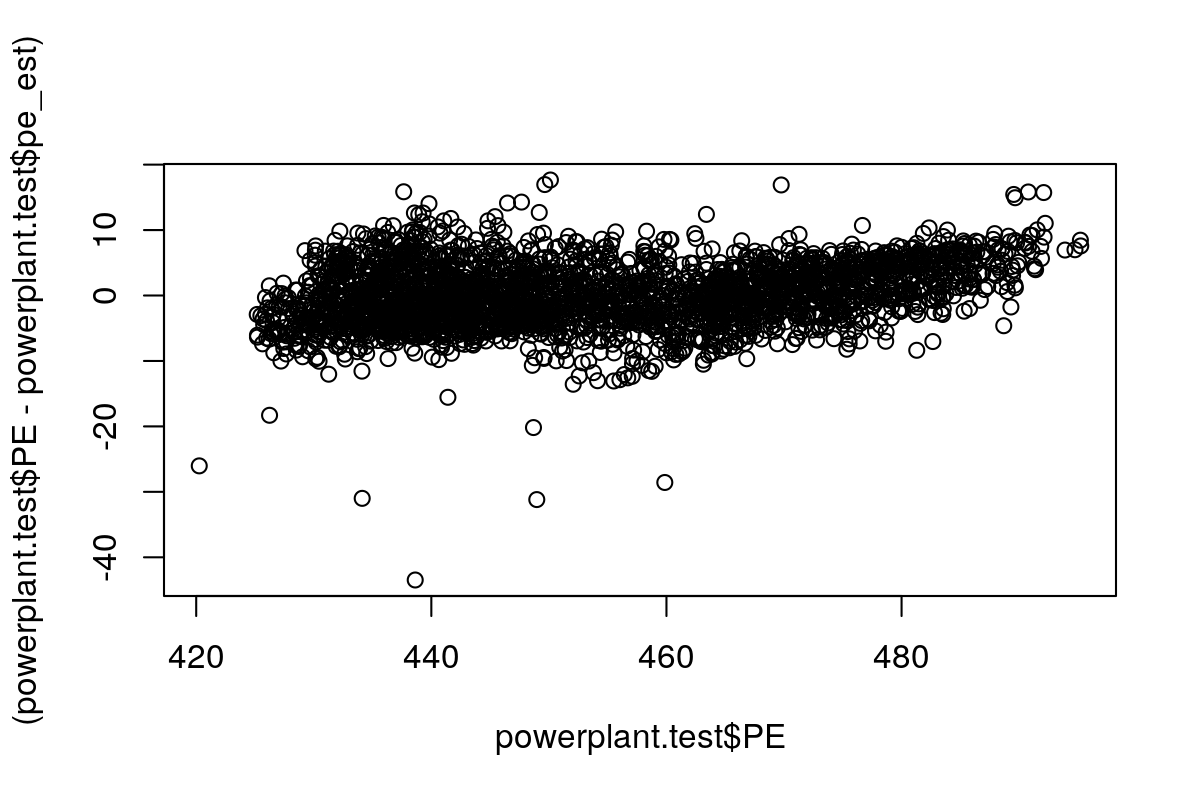

In [21]:
powerplant.test$pe_est<-predict(model_powerplant_clean,powerplant.test)
plot(powerplant.test$PE,(powerplant.test$PE-powerplant.test$pe_est))
sqrt(mean((powerplant.test$PE-powerplant.test$pe_est)^2))
myrsquared(powerplant.test$PE,powerplant.test$pe_est)

### Prediciendo la dureza del hormigón

Resumen: El hormigón es el material más importante en la ingeniería civil. La resistencia a la compresión del hormigón es una función altamente no lineal de la edad y ingredientes Estos ingredientes incluyen cemento, escoria de alto horno, cenizas volantes, agua, superplastificante, agregado grueso y agregado fino.

Fuente:
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

**Características de los datos:**
    
La resistencia a la compresión real del hormigón (MPa) para una mezcla dada bajo un
la edad específica (días) se determinó a partir del laboratorio. Los datos están en forma cruda (no a escala).

**Resumen estadístico:**

Número de instancias (observaciones): 1030
Cantidad de Atributos: 9
Desglose de atributos: 8 variables de entrada cuantitativas y 1 variable de salida cuantitativa
Faltan valores de atributo: ninguno


* Cemento (componente 1) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Escoria de alto horno (componente 2) - cuantitativa - kg en una mezcla de m3 - Variable de entrada
* Cenizas volantes (componente 3) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agua (componente 4) - cuantitativa - kg en una mezcla m3 - Variable de entrada
* Superplastificante (componente 5) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agregado grueso (componente 6) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Agregado fino (componente 7) - cuantitativo - kg en una mezcla m3 - Variable de entrada
* Edad - cuantitativa - Día (1 ~ 365) - Variable de entrada
* Resistencia a la compresión del hormigón - cuantitativa - MPa - Variable de salida


In [9]:
concrete<-read.csv("data/Concrete_Data.csv",
                   col.names=c("cemento","escoria","cenizas","agua","plastificante","aggrueso","agfino","edad","resistencia"))
head(concrete)

,cemento,escoria,cenizas,agua,plastificante,aggrueso,agfino,edad,resistencia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


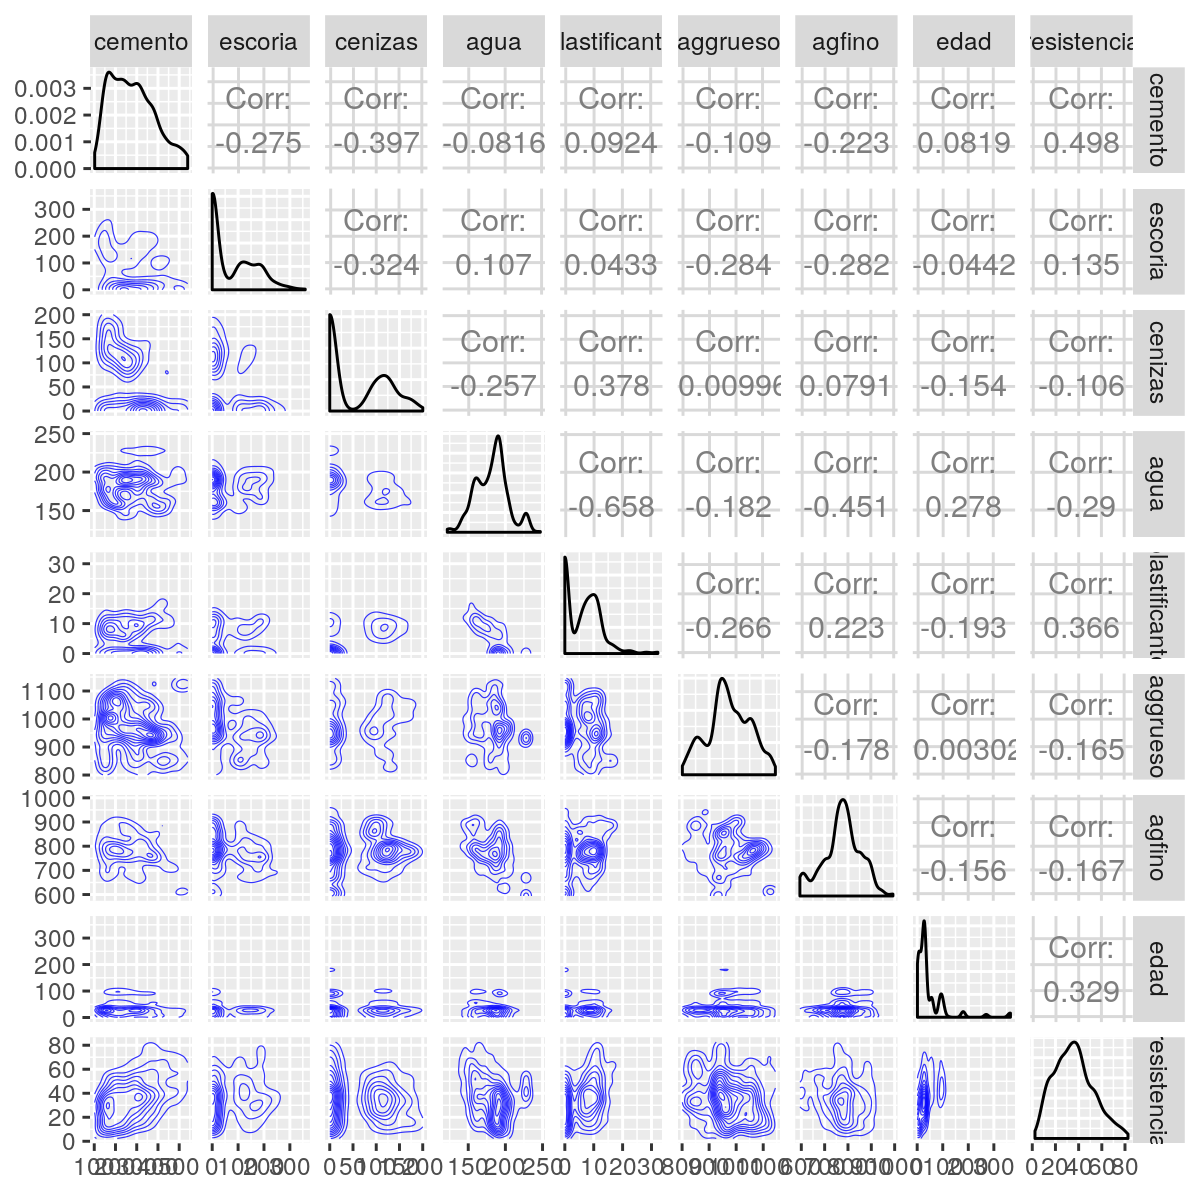

In [12]:
ggpairs(concrete, 
        lower = list(continuous = wrap("density", alpha = 0.8,size=0.2,color='blue'))
       #lower = list(continuous = wrap("points", alpha = 0.3,size=0.1,color='blue'))
       )

In [13]:
set.seed(12)
idx<-sample(1:nrow(concrete),nrow(concrete)*0.7)
train.df<-concrete[idx,]
test.df<-concrete[-idx,]

In [14]:
model<-lm(resistencia~.,train.df)
summary(model)


Call:
lm(formula = resistencia ~ ., data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.094  -6.406   0.848   6.749  32.108 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -21.481292  31.559118  -0.681 0.496303    
cemento         0.121575   0.010075  12.067  < 2e-16 ***
escoria         0.104719   0.012046   8.694  < 2e-16 ***
cenizas         0.089256   0.014763   6.046  2.4e-09 ***
agua           -0.160274   0.047117  -3.402 0.000707 ***
plastificante   0.289828   0.110324   2.627 0.008798 ** 
aggrueso        0.019407   0.011219   1.730 0.084097 .  
agfino          0.017913   0.012760   1.404 0.160794    
edad            0.113514   0.006385  17.779  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.49 on 712 degrees of freedom
Multiple R-squared:  0.6309,	Adjusted R-squared:  0.6268 
F-statistic: 152.1 on 8 and 712 DF,  p-value: < 2.2e-16


[1] "R^2 testing: 0.565390164283185"

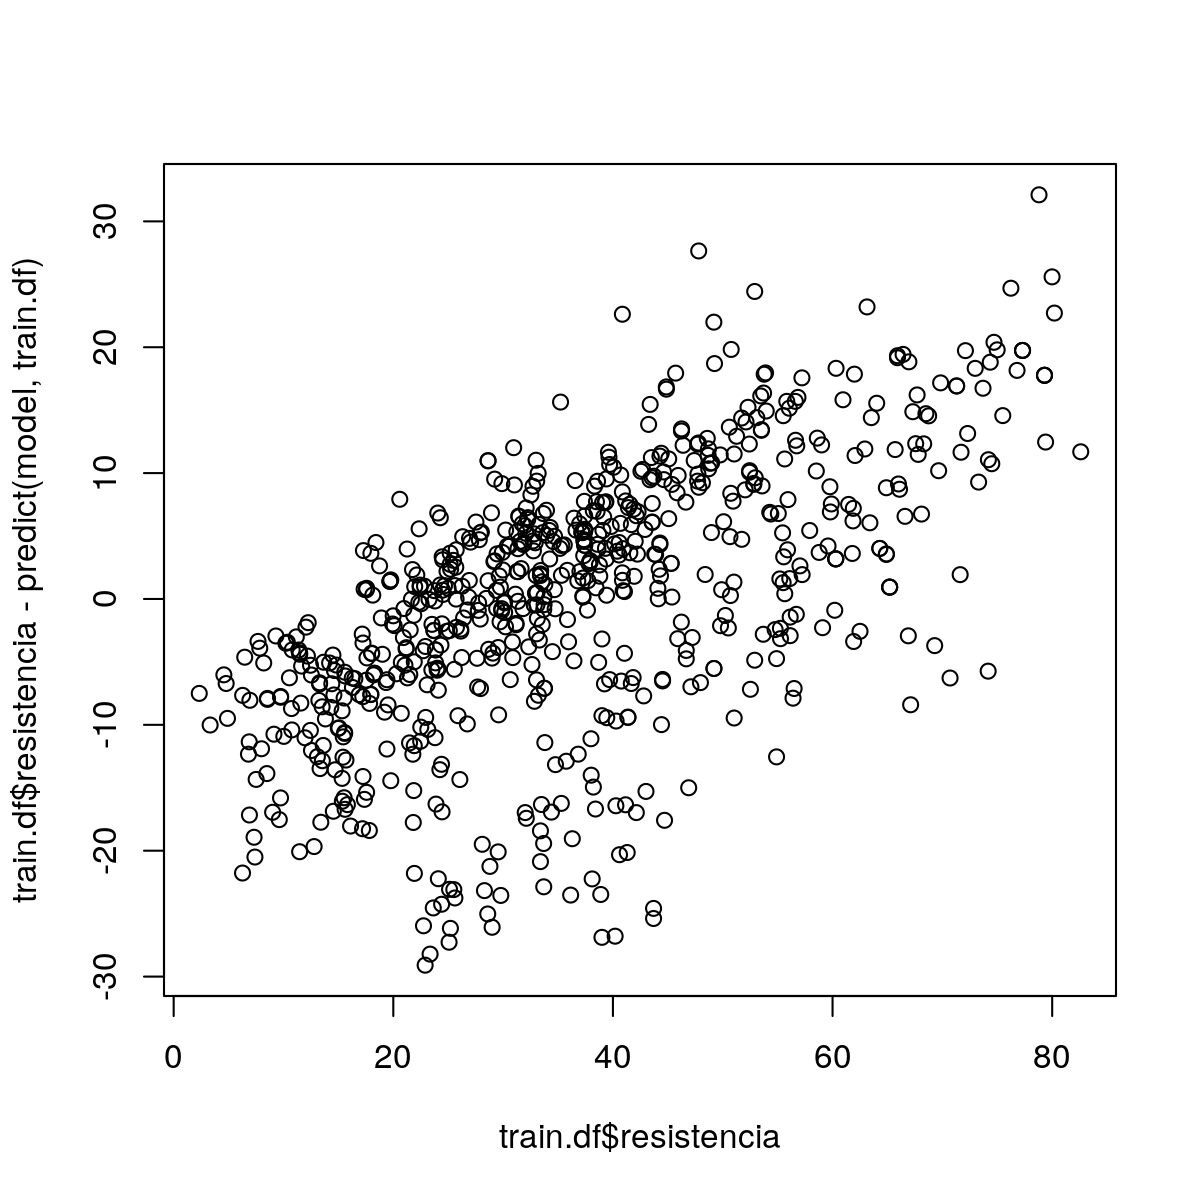

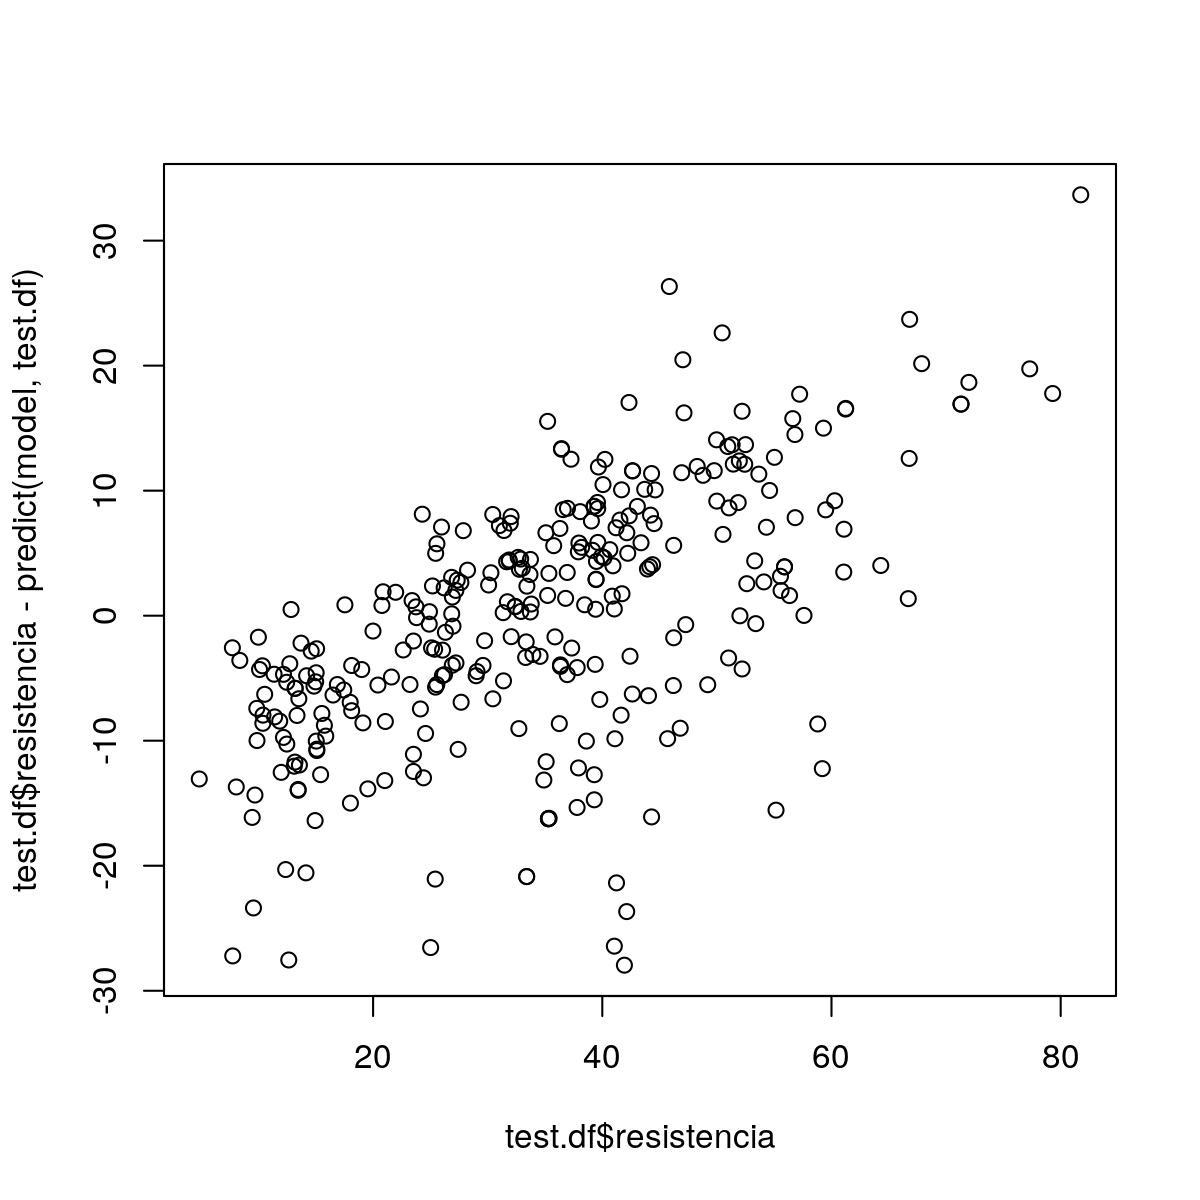

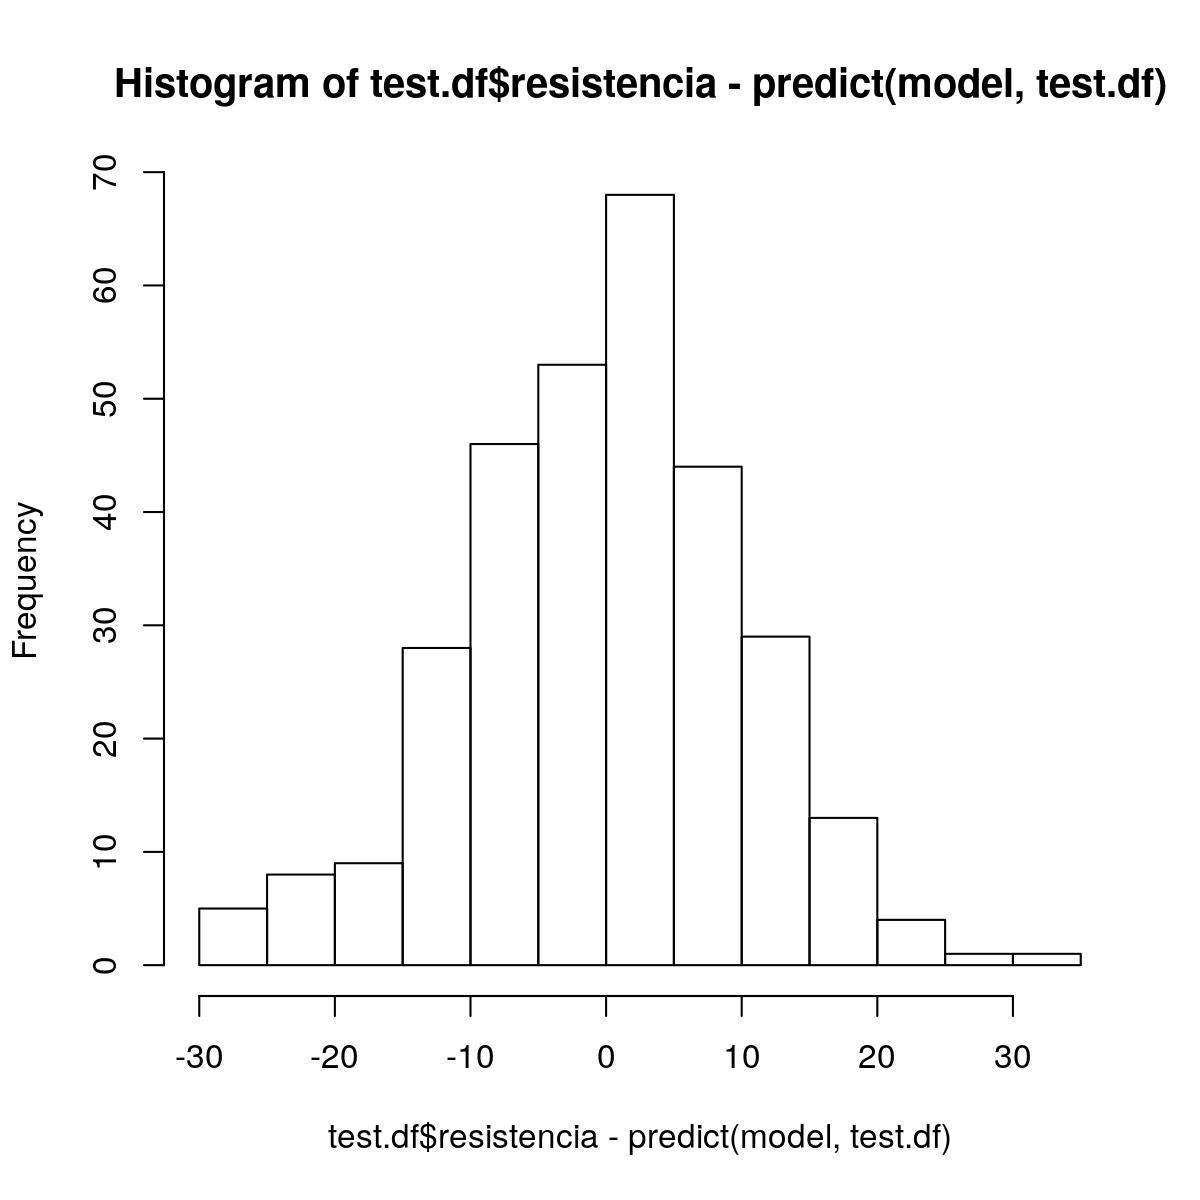

In [17]:
paste("R^2 testing:",myrsquared(test.df$resistencia,predict(model,test.df)))
plot(train.df$resistencia,train.df$resistencia-predict(model,train.df))
plot(test.df$resistencia,test.df$resistencia-predict(model,test.df))
hist(test.df$resistencia-predict(model,test.df))

Warning message in predict.lm(model, train.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, train.df):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test.df):
“prediction from a rank-deficient fit may be misleading”


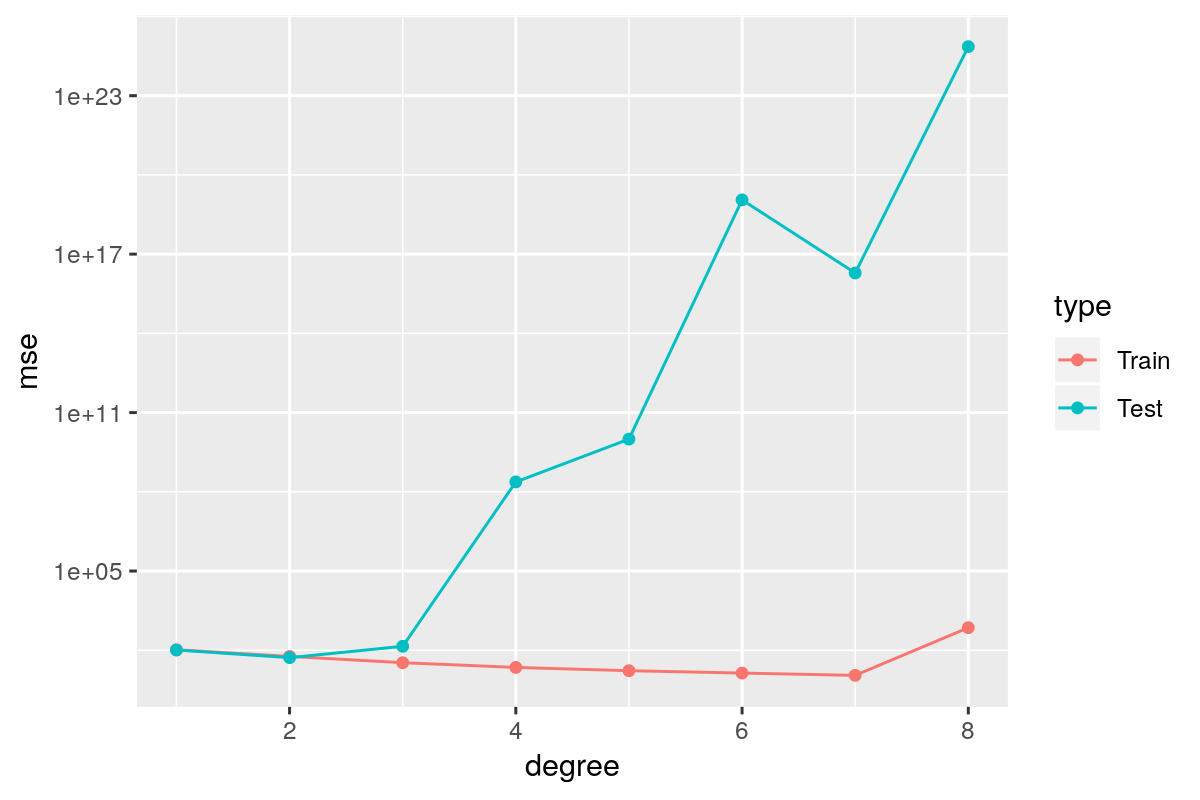

In [18]:
calcmse<-function(y_real,y_est){
  sum((y_real-y_est)^2,na.rm = T)/length(y_real)
}

mse_train<-c()
mse_test<-c()
for (N in 1:8){
    model<-lm(resistencia~
           poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
           poly(agua,N)*poly(plastificante,N)+
           poly(aggrueso,N)*poly(agfino,N)+
           poly(edad,N),data = train.df)
    
    yp_train<-predict(model,train.df)
    mse_train[N]<-calcmse(train.df$resistencia,yp_train)
  
    yp_test<-predict(model,test.df)
    mse_test[N] <-calcmse(test.df$resistencia,yp_test)
}
mse.df<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df<-rbind(mse.df,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))

library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(mse.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()+scale_y_log10()


In [20]:
mse.df

degree,mse,type
<int>,<dbl>,<fct>
1,1.044485e+02,Train
2,5.837840e+01,Train
3,3.383201e+01,Train
4,2.236717e+01,Train
5,1.685384e+01,Train
6,1.368159e+01,Train
7,1.121124e+01,Train
8,7.169933e+02,Train
1,1.018512e+02,Test


[1] "R^2 testing: 0.780105348187794"

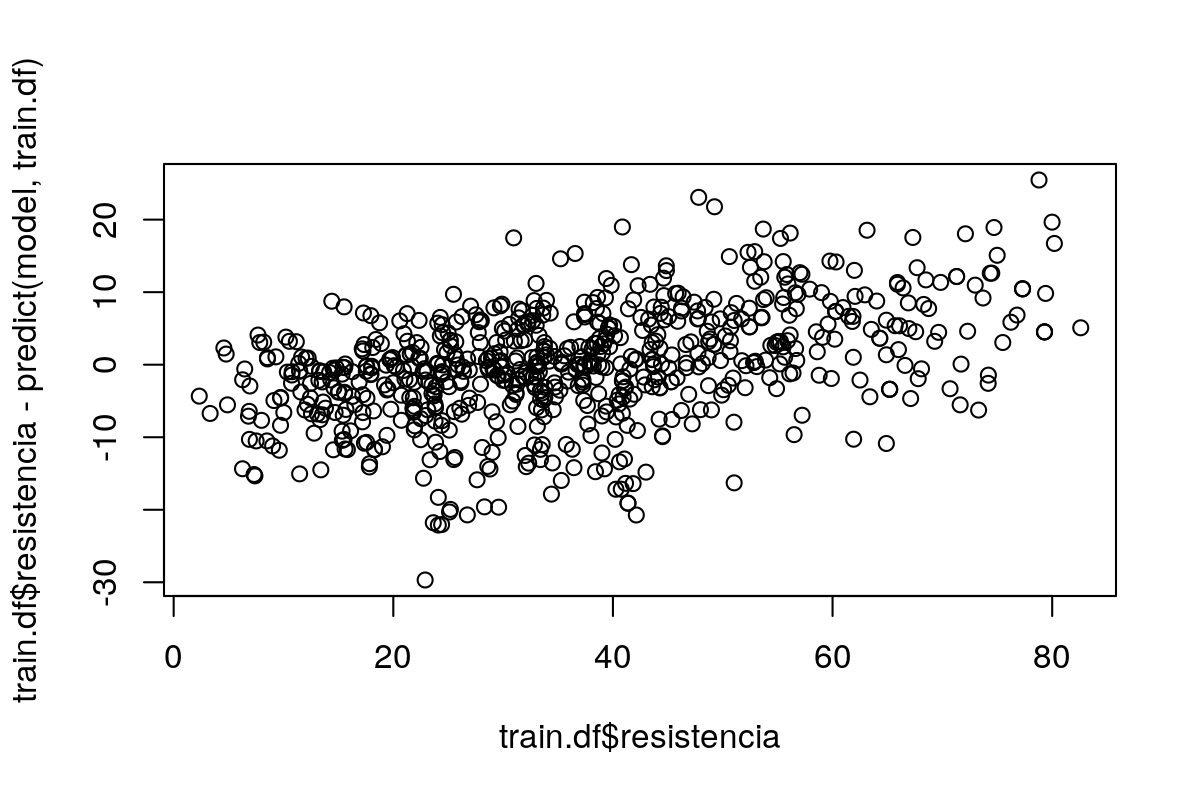

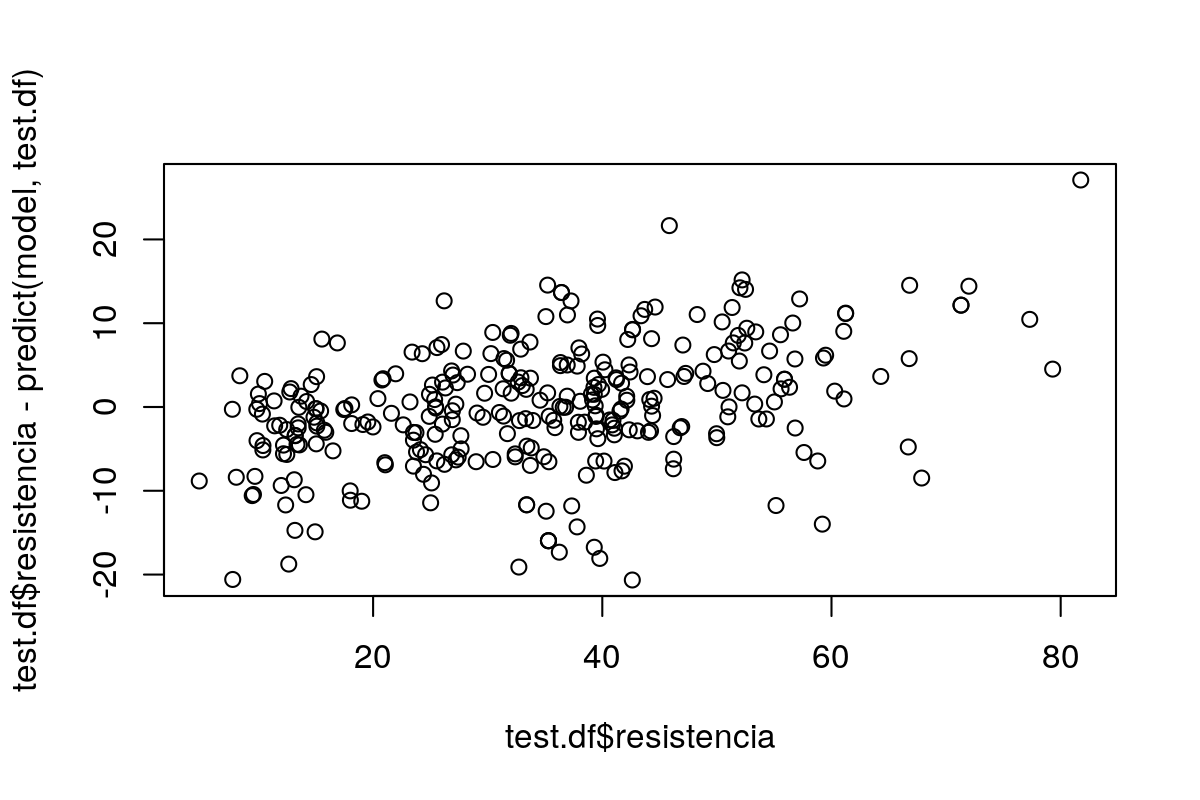

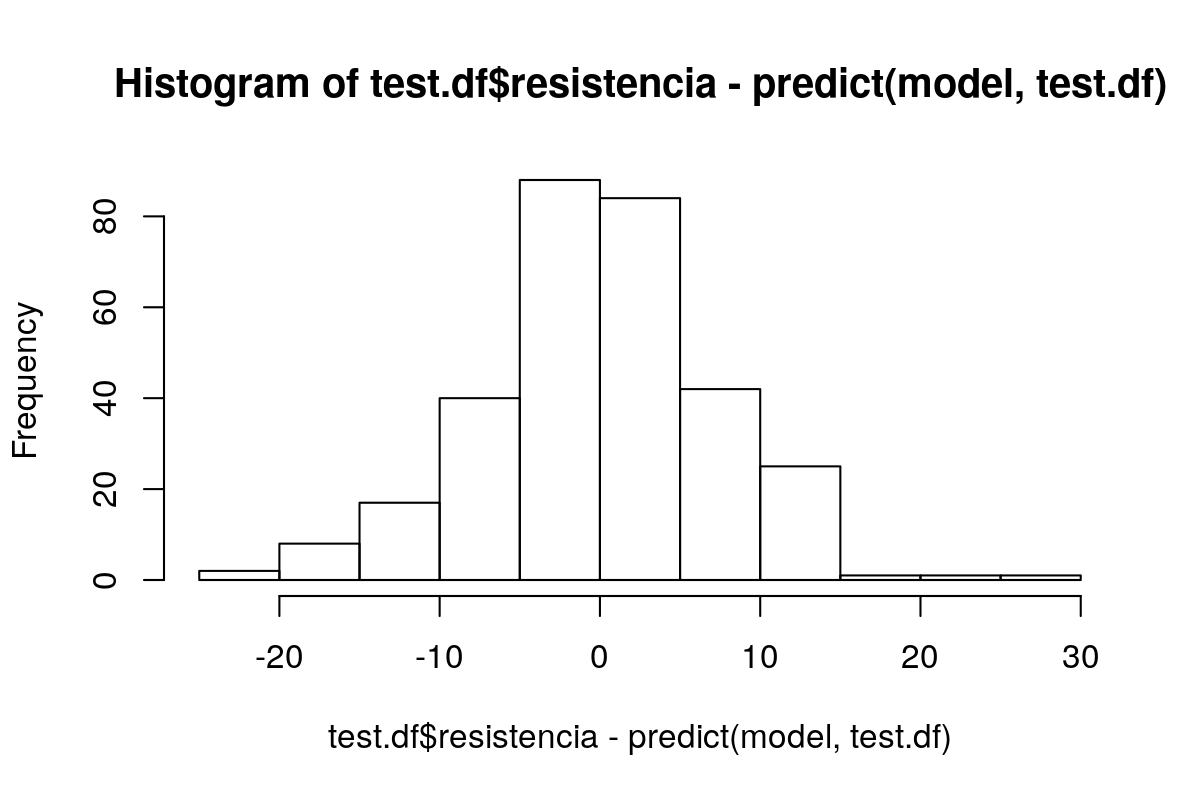

In [25]:
N<-2
model<-lm(resistencia~
       poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
       poly(agua,N)*poly(plastificante,N)+
       poly(aggrueso,N)*poly(agfino,N)+
       poly(edad,N),data = train.df)
paste("R^2 testing:",myrsquared(test.df$resistencia,predict(model,test.df)))
plot(train.df$resistencia,train.df$resistencia-predict(model,train.df))
plot(test.df$resistencia,test.df$resistencia-predict(model,test.df))
hist(test.df$resistencia-predict(model,test.df),10)


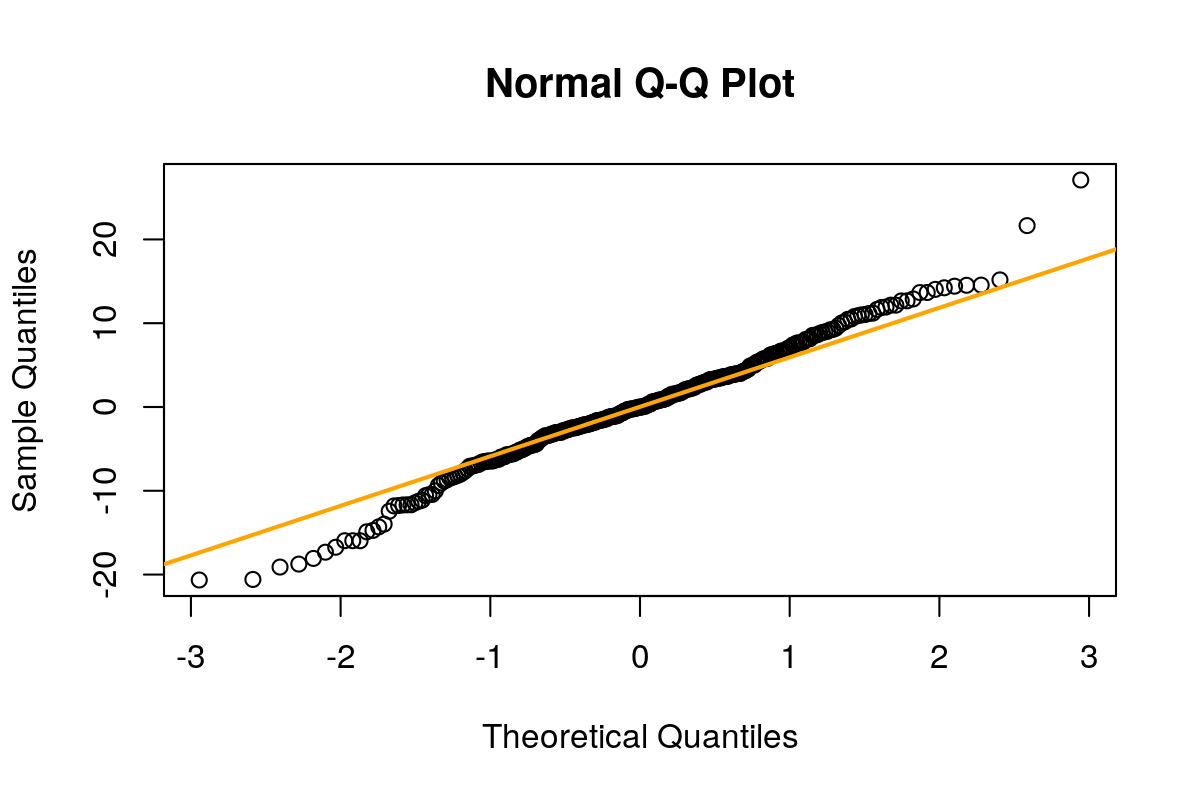

In [30]:
qqnorm(test.df$resistencia-predict(model,test.df))
qqline(test.df$resistencia-predict(model,test.df), col = 'orange', lwd =2)

### Regularización

Si el modelo es demasiado complejo ocurre el **sobreajuste** el modelo aprende sobre el ruido de nuestro modelo de entrenamiento y no es capaz de  generalizar bien.
Para evitar el sobreajuste(overfitting) se puede recurrir a simplificar el modelo o a poner limitaciones sobre el mismo. Esto se conoce con el nombre de regularización.
* Regularización Lasso o $L$: permite seleccionar los parámetros que más afectan al resultado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j | \beta |
\\]
* Regularización Ridge o $L^2$: se evita que los parámetros crezcan demasiado. Se añade la función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j \beta^2
\\]
* Elástica: Una solución de compromiso entre las dos:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+ \alpha \lambda \sum_j | \beta |+(1-\alpha)/2 \lambda \sum_j \beta^2
\\]


### Ejemplo regularización



Vamos a ver un ejemplo de regresión lineal con tres variables: x0, x1 y x2.

La función que tratamos de modelizar es del tipo:
\\[
y=\beta_1+\beta_2·x_1+\beta_3·x_2+\beta_4·x_3
\\]


In [26]:
#Definimos la función que queremos modelizar en función de beta
myfunction<-function(x_,beta){beta[1]+x_[,1]*beta[2]+x_[,2]*beta[3]+x_[,3]*beta[4]}

In [27]:
beta_real<-c(3,0.1,-5,4)

set.seed(123)
get_example_data_frame<-function(n=100){    
    x1<-runif(n,min=-10,max=10)
    x2<-rnorm(n,mean=7,sd=9)
    x3<-x1*rnorm(n,mean=3,sd=2)
 
    df<-data.frame(x1,x2,x3)
    df$y=myfunction(df,beta=beta_real)+rnorm(n,mean=0,sd=10)
    df
}
df<-get_example_data_frame()
head(df)

,x1,x2,x3,y
,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.248450,9.279867,-19.438686,-125.33495
2,5.766103,6.743079,26.167061,68.91070
3,-1.820462,6.614166,-6.670909,-60.37568
4,7.660348,19.317421,7.532013,-61.78805
5,8.809346,4.968061,24.323438,92.31947
6,-9.088870,20.648235,-22.169657,-190.71434


In [28]:
cor(df)

,x1,x2,x3,y
x1,1.00000000,-0.02653768,0.85240646,0.7701336
x2,-0.02653768,1.00000000,0.01350409,-0.4503744
x3,0.85240646,0.01350409,1.00000000,0.8804553
y,0.77013363,-0.45037439,0.88045529,1.0000000


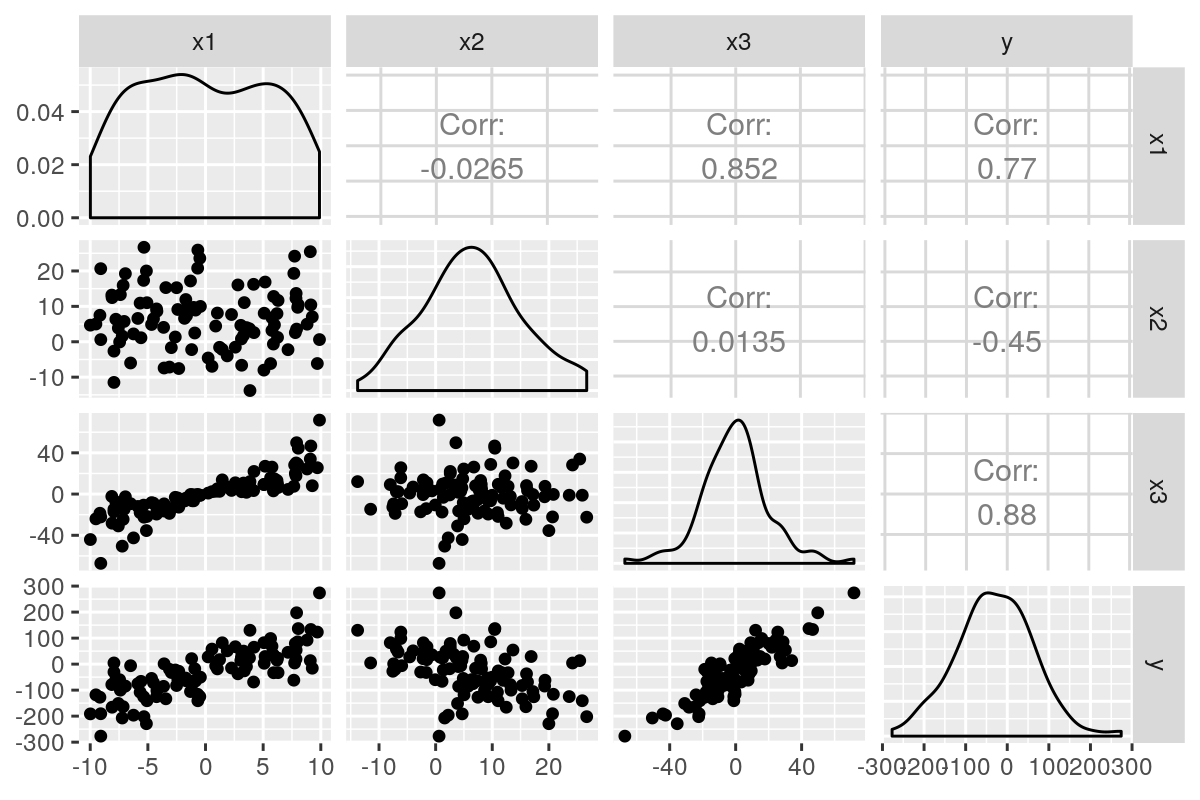

In [29]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 200)
ggpairs(df)

In [30]:
model <- lm(y~x1+x2+x3,data=df)
summary(model)


Call:
lm(formula = y ~ x1 + x2 + x3, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.560  -6.182  -0.610   7.208  21.655 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.37292    1.26409   3.459 0.000809 ***
x1           0.12385    0.34041   0.364 0.716792    
x2          -5.01778    0.11686 -42.938  < 2e-16 ***
x3           3.99738    0.09342  42.789  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.07 on 96 degrees of freedom
Multiple R-squared:  0.9889,	Adjusted R-squared:  0.9886 
F-statistic:  2862 on 3 and 96 DF,  p-value: < 2.2e-16


In [31]:
confint(model)

,2.5 %,97.5 %
(Intercept),1.8637169,6.8821136
x1,-0.5518635,0.7995614
x2,-5.2497484,-4.7858148
x3,3.8119412,4.1828175


In [32]:
library(pracma)
#Definimos una función de optimización que nos permite ver como evoluciona Beta

optim_beta<-function(mymodel,mse,maxiter=1e3,delta=0.0002,beta_0=c(0,0,0,0)){
    
    x_historico<-data.frame(beta1=rep(NA,maxiter),
                            beta2=rep(NA,maxiter),
                            beta3=rep(NA,maxiter),
                            beta4=rep(NA,maxiter),
                            mse=rep(NA,maxiter))
    x_historico[1,]<-c(beta_0,mse(beta_0))

    for (i in 2:maxiter){
        g <- grad(mse,beta_0)        
        beta_new <- beta_0 - g*delta
        beta_0 <- beta_new
        x_historico[i,]<-c(beta_0,mse=mse(beta_0))
    }
    x_historico<-na.omit(x_historico)
    nrow(x_historico)
    x_historico$step=1:nrow(x_historico)
    x_historico
}

In [33]:
#Definimos la métrica que queremos minimizar, en este caso el error cuadrático medio
mse<-function(beta){
    sum((df$y-myfunction(df[,c('x1','x2','x3')],beta))^2)/nrow(df)    
}
x_historico<-optim_beta(myfunction,mse,maxiter=1e4,delta=0.0005)

Loading required package: gridExtra



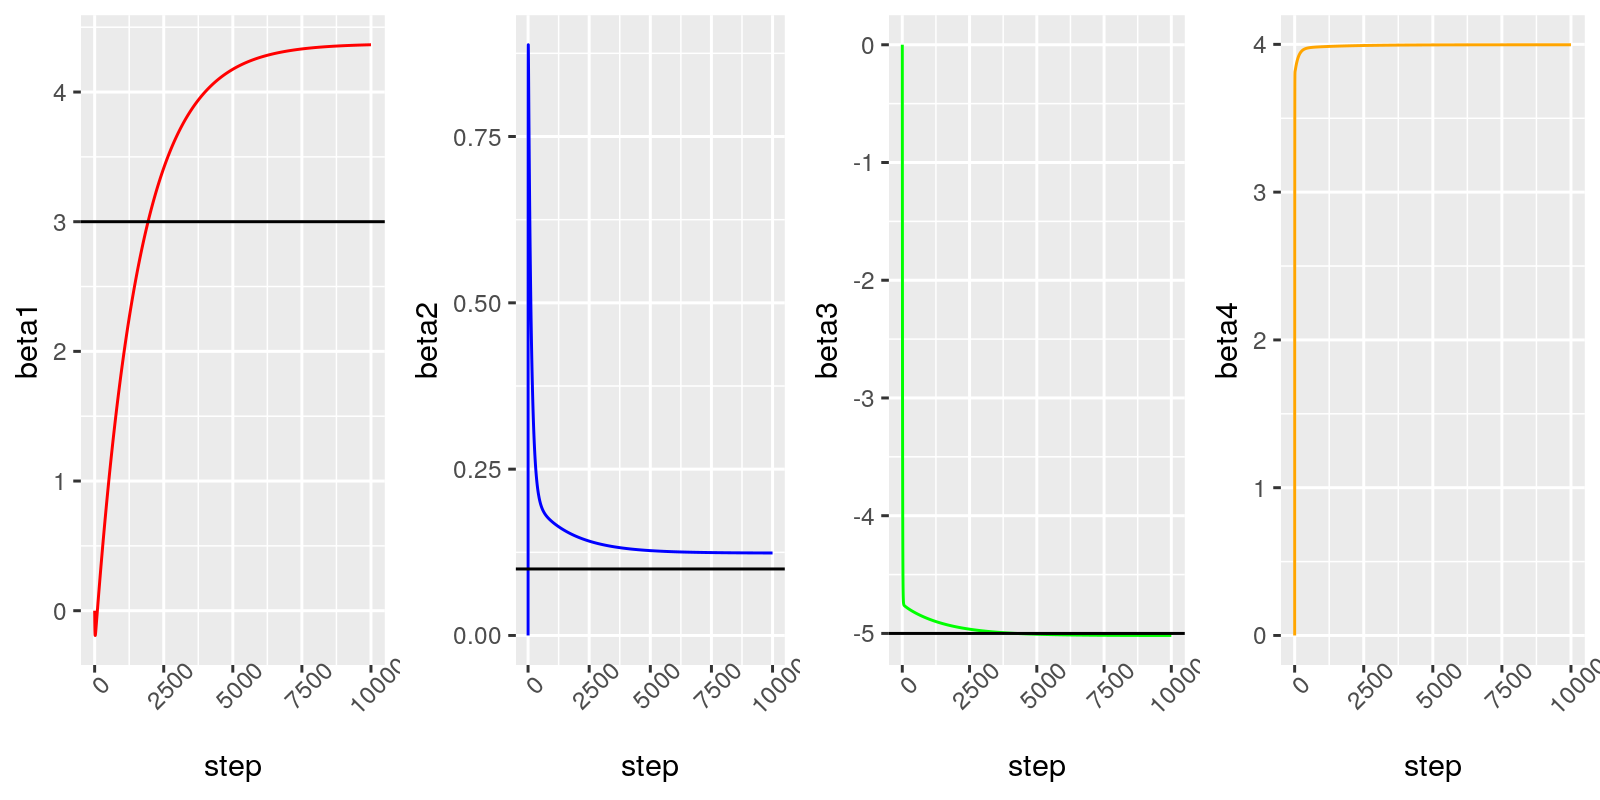

In [34]:
options(repr.plot.height=4,repr.plot.width=8)
g1<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta1),color='red')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[1],color='black')
g2<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta2),color='blue')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[2],color='black')
g3<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta3),color='green')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[3],color='black')
g4<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta4),color='orange')+
    theme(axis.text.x = element_text(angle = 45))#+geom_hline(yintercept=beta_real[4],color='black')

library(egg)
grid.arrange(g1, g2, g3,g4, nrow = 1)

#### Regularización Lasso

Ahora vamos a aplicar una regularización L1 o de Lasso, añadamos el término:

\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j | \beta_j |
\\]

De los coeficientes $\beta_j$ no tenemos en cuenta la intersección. Notar que:
* Cuando $\lambda \rightarrow 0$, entonces $\beta_{LASSO} \rightarrow \beta_{original mínimos cuadrados}$ 
* Cuando $\lambda \rightarrow \infty$, entonces $\beta_{LASSO} \rightarrow 0$ 

Tratamos de minimizar la suma de todos los demás coeficientes:

In [39]:
#lambda<-40
lambda<-2
loss_lasso<-function(beta){
    sum((df$y-myfunction(df[,-ncol(df)],beta))^2)/(2*nrow(df))+lambda*sum(abs(beta[-1]))
}
x_historico<-optim_beta(myfunction,loss_lasso,maxiter=1e4)

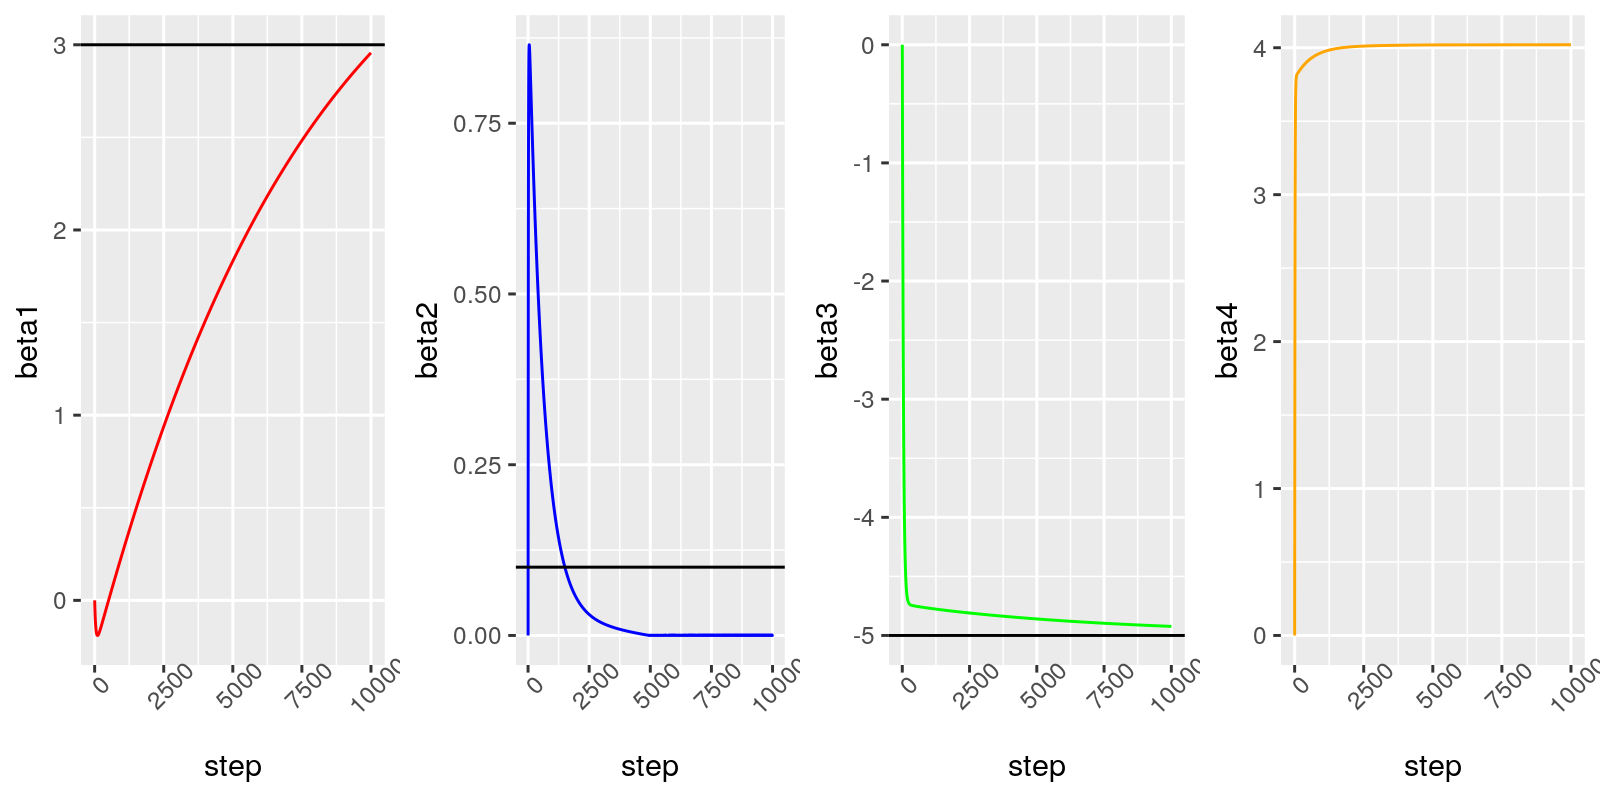

In [40]:
options(repr.plot.height=4,repr.plot.width=8)
library(ggplot2)

g1<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta1),color='red')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[1],color='black')
g2<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta2),color='blue')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[2],color='black')
g3<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta3),color='green')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[3],color='black')
g4<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta4),color='orange')+
    theme(axis.text.x = element_text(angle = 45))#+geom_hline(yintercept=beta_real[4],color='black')

library(egg)
grid.arrange(g1, g2, g3,g4, nrow = 1)

La regularización **Lasso** descarta los componentes que tienen menos certeza en el resultado final, es decir, los coeficientes con un pvalor más alto.

En R existe el paquete [glmnet](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html) que te permite apilcar regularización a modelos lineales

In [42]:
library(glmnet)
model<-glmnet(as.matrix(df[,c('x1','x2','x3')]),as.matrix(df[,'y']),lambda=2,alpha=1)
coefficients(model)

4 x 1 sparse Matrix of class "dgCMatrix"
                   s0
(Intercept)  2.829512
x1           .       
x2          -4.786198
x3           3.928247

In [43]:
model


Call:  glmnet(x = as.matrix(df[, c("x1", "x2", "x3")]), y = as.matrix(df[,      "y"]), alpha = 1, lambda = 2) 

  Df  %Dev Lambda
1  2 0.988      2

Una vez que nos decantamos por una regularización Lasso ¿Cómo obtenemos el valor óptimo de $\lambda$ ?

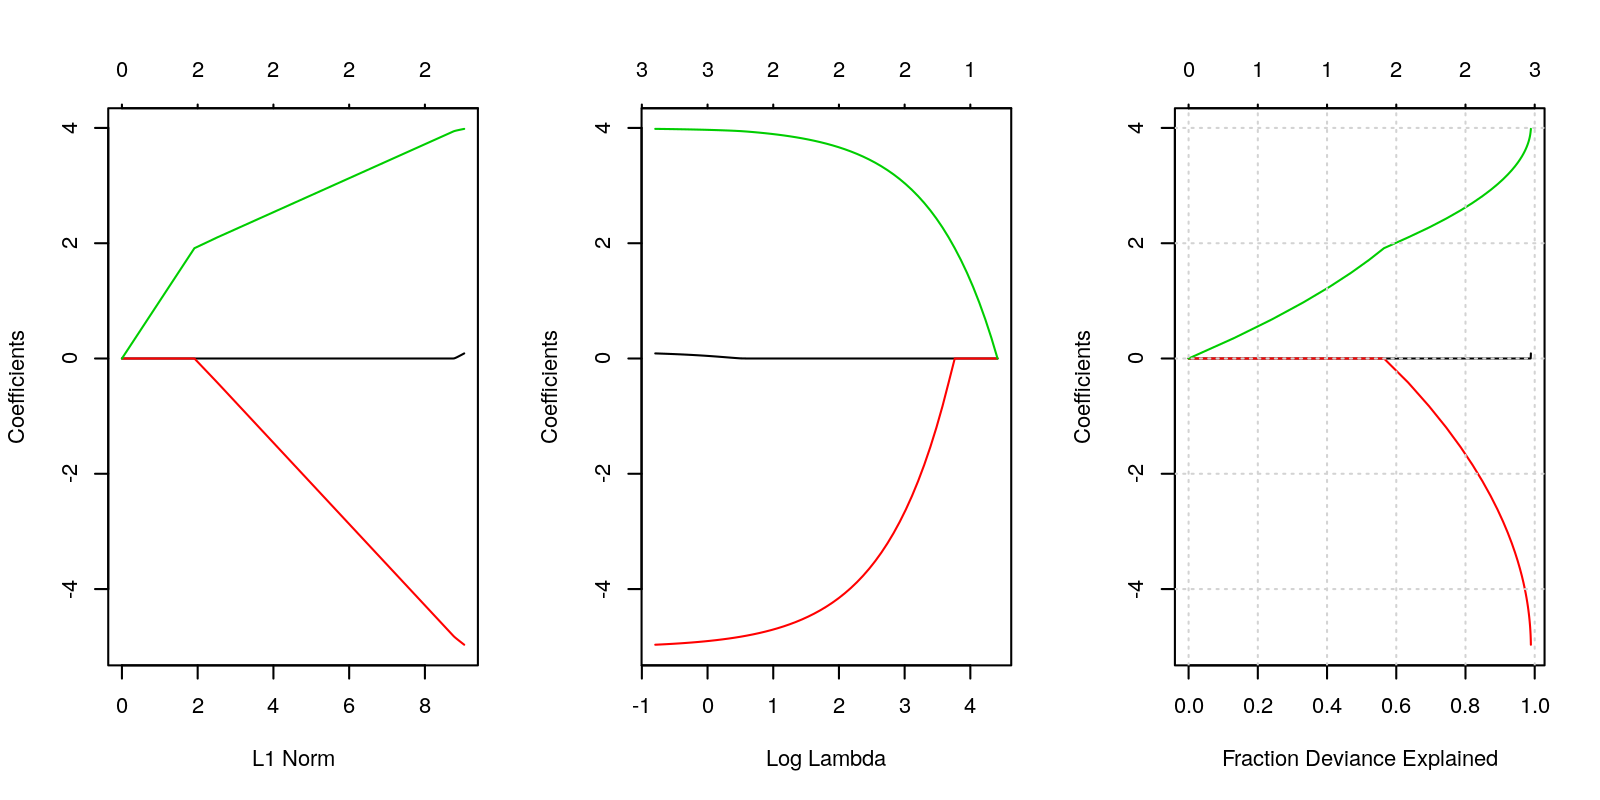

In [44]:
fit<-glmnet(as.matrix(df[,c('x1','x2','x3')]),as.matrix(df[,'y']),alpha=1)
par(mfrow=c(1,3))
plot(fit,label=TRUE)
plot(fit,label=TRUE,xvar="lambda")
plot(fit,label=TRUE,xvar="dev")
grid()
#print(fit)

In [45]:
coef(fit,s=2)

4 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept)  2.829512
x1           .       
x2          -4.786198
x3           3.928247

Podemos ir probando con varios valores de $\lambda$ hasta encontrar con el *óptimo*.

,x1,x2,x3,y,pred1,pred2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.898671,6.337996,12.39149119,32.3059753,21.1714430,2.950632
2,-4.797351,-3.517863,-4.85781066,0.4048667,0.5840218,-26.320760
3,-9.537110,1.287266,-48.19645484,-197.5091619,-192.6591559,-144.237486
4,7.247991,6.740426,32.63134319,85.3873655,98.7524624,54.048029
5,-3.308241,13.036264,0.06065023,-54.3656883,-59.3263770,-38.599818
6,2.635777,-7.854919,7.40575730,70.0538596,69.5163498,11.514352


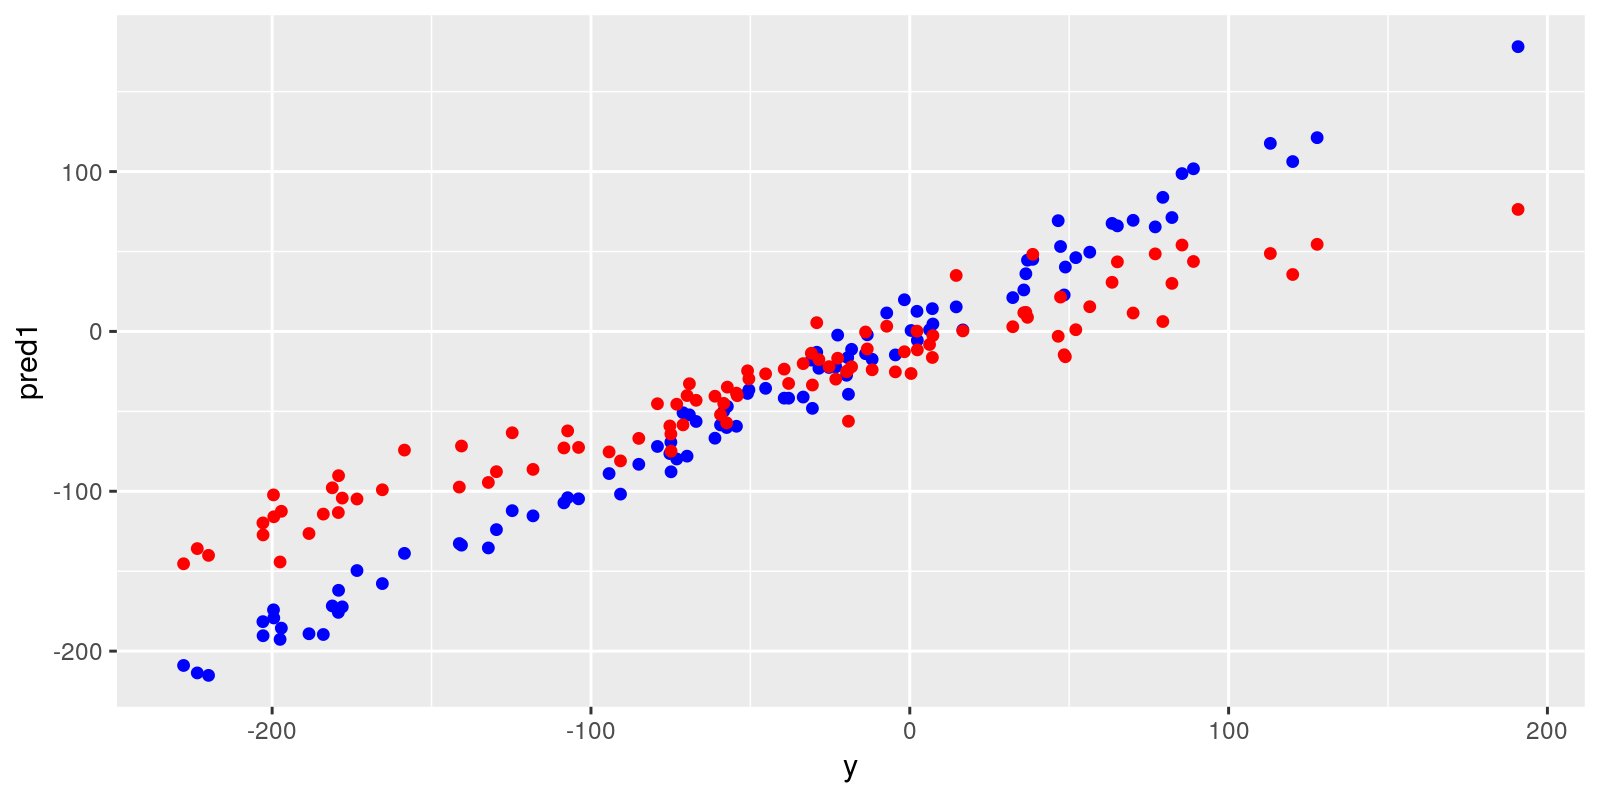

In [46]:
df_test<-get_example_data_frame(n=100)
df_test[,c("pred1","pred2")]<-predict(fit,newx=as.matrix(df_test[,c('x1','x2','x3')]),s=c(2,30))
head(df_test)
ggplot(df_test,aes(x=y))+geom_point(aes(y=pred1),color="blue")+geom_point(aes(y=pred2),color="red")

Busca el mejor elemento utilizando validación cruzada (*cross-validation*):

![](img/cross-validation.png)

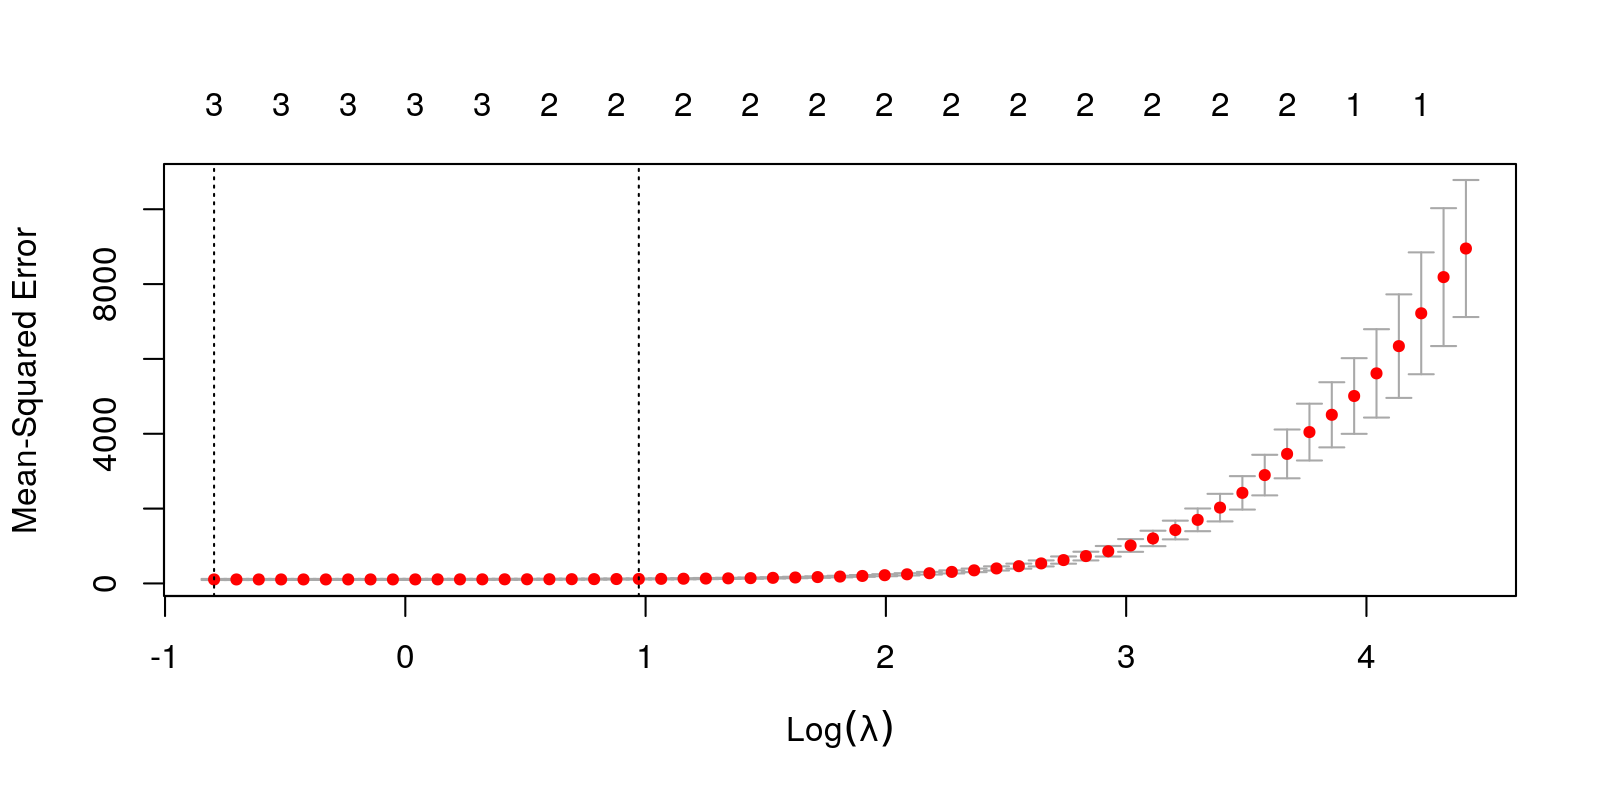

In [47]:
cvfit<-cv.glmnet(as.matrix(df[,c('x1','x2','x3')]),as.matrix(df[,'y']),nfolds=10,alpha=1)
plot(cvfit)

El modelo que tiene un error cuadrático medio más bajo aparece en la variable *cvfit$lambda.min*

El modelo que tiene un mayor valor de $\lambda$ cuya varianza del error está dentro de 1 *desviación típica* del *mínimo* aparece en la variable *cvfit$lambda.1se*. 

Al hacer cross-validation el MSE no será un valor único sino que tendremos *nfolds* diferentes. De todos estos MSE podemos calular la *media* y la *desviación típica*. El valor de *lambda.1se* viene a significar como el modelo más sencillo ($\lambda$ más alto) que no se diferencia considerablemente del *mínimo*.

In [48]:
cvfit$lambda.min
cvfit$lambda.1se

[1] 0.4511842

[1] 2.642595

In [50]:
coef(cvfit, s = "lambda.min")

4 x 1 sparse Matrix of class "dgCMatrix"
                    1
(Intercept)  4.026648
x1           0.088172
x2          -4.965742
x3           3.983595

#### Regularización Ridge

Ahora vamos a aplicar una regularización L2 o Ridge, añadamos el término:

\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+\lambda \sum_j \beta_j^2
\\]

De los coeficientes $\beta_j$ no tenemos en cuenta la intersección. Notar que:
* Cuando $\lambda \rightarrow 0$, entonces $\beta_{RIDGE} \rightarrow \beta_{original mínimos cuadrados}$ 
* Cuando $\lambda \rightarrow \infty$, entonces $\beta_{RIDGE} \rightarrow 0$ 

Tratamos de minimizar la suma de todos los demás coeficientes:

In [53]:
lambda<-50
#lambda<-10
loss_ridge<-function(beta){
    mean((df$y-myfunction(df[,c('x1','x2','x3')],beta))^2)+lambda*sum((beta[c(2,3,4)])^2)
}
x_historico<-optim_beta(myfunction,loss_ridge,maxiter=1e4,delta=0.001, beta_0=c(3,0.1,-1,3) )

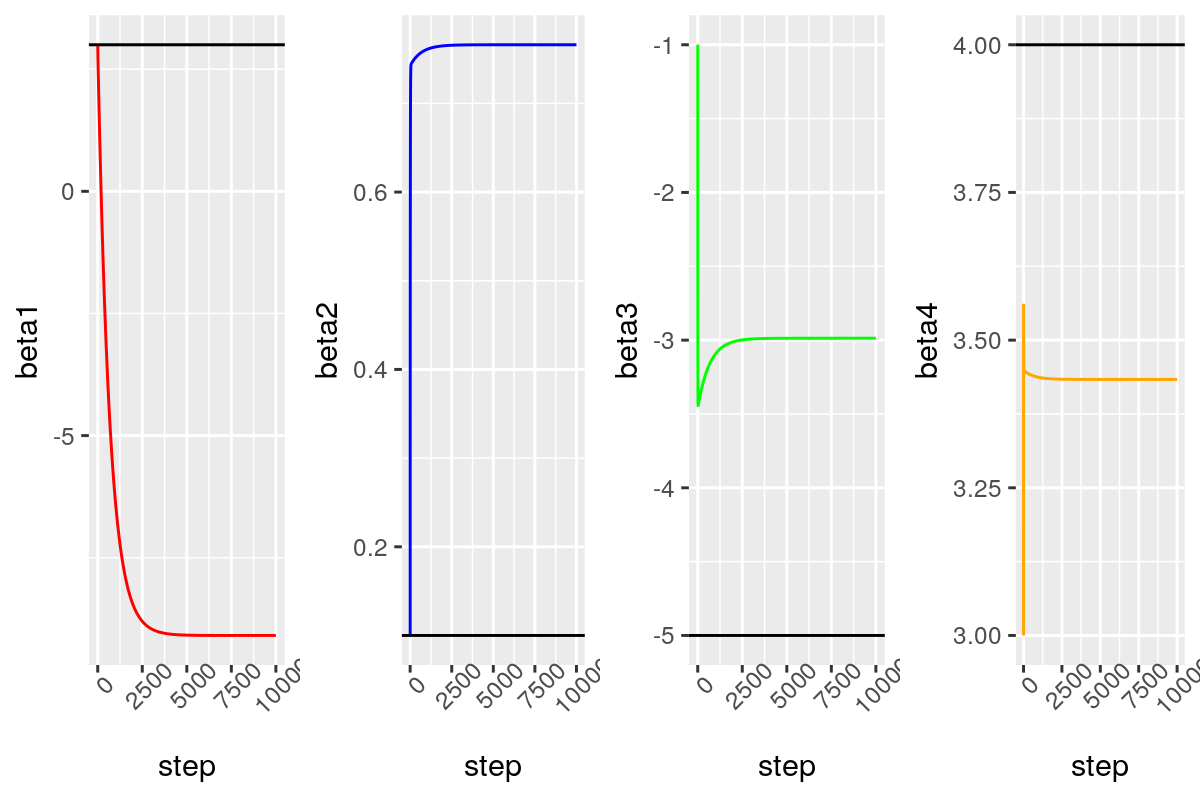

In [54]:
options(repr.plot.height=4,repr.plot.width=6)
library(ggplot2)

g1<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta1),color='red')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[1],color='black')
g2<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta2),color='blue')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[2],color='black')
g3<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta3),color='green')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[3],color='black')
g4<-ggplot(x_historico,aes(x=step))+geom_line(aes(y=beta4),color='orange')+
    theme(axis.text.x = element_text(angle = 45))+geom_hline(yintercept=beta_real[4],color='black')

library(egg)
grid.arrange(g1, g2, g3,g4, nrow = 1)

La regularización **Ridge** acerca los coeficientes de las variables más correladas el uno hacie al otro.

También podemos usar el paquete [glmnet](https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html), en este caso con $\alpha=0$ ya que utiliza la siguiente función de coste:
\\[
Coste = {1 \over n} \sum_{i=0}^n{(Y-\hat{Y})^2}+ \alpha \lambda \sum_j | \beta_j |+(1-\alpha)/2 \lambda \sum_j \beta_j^2
\\]

In [55]:
library(glmnet)
model<-glmnet(as.matrix(df[,c('x1','x2','x3')]),as.matrix(df[,'y']),lambda=20,alpha=0)
coefficients(model)

4 x 1 sparse Matrix of class "dgCMatrix"
                   s0
(Intercept) -2.471962
x1           3.719980
x2          -4.047108
x3           2.596833

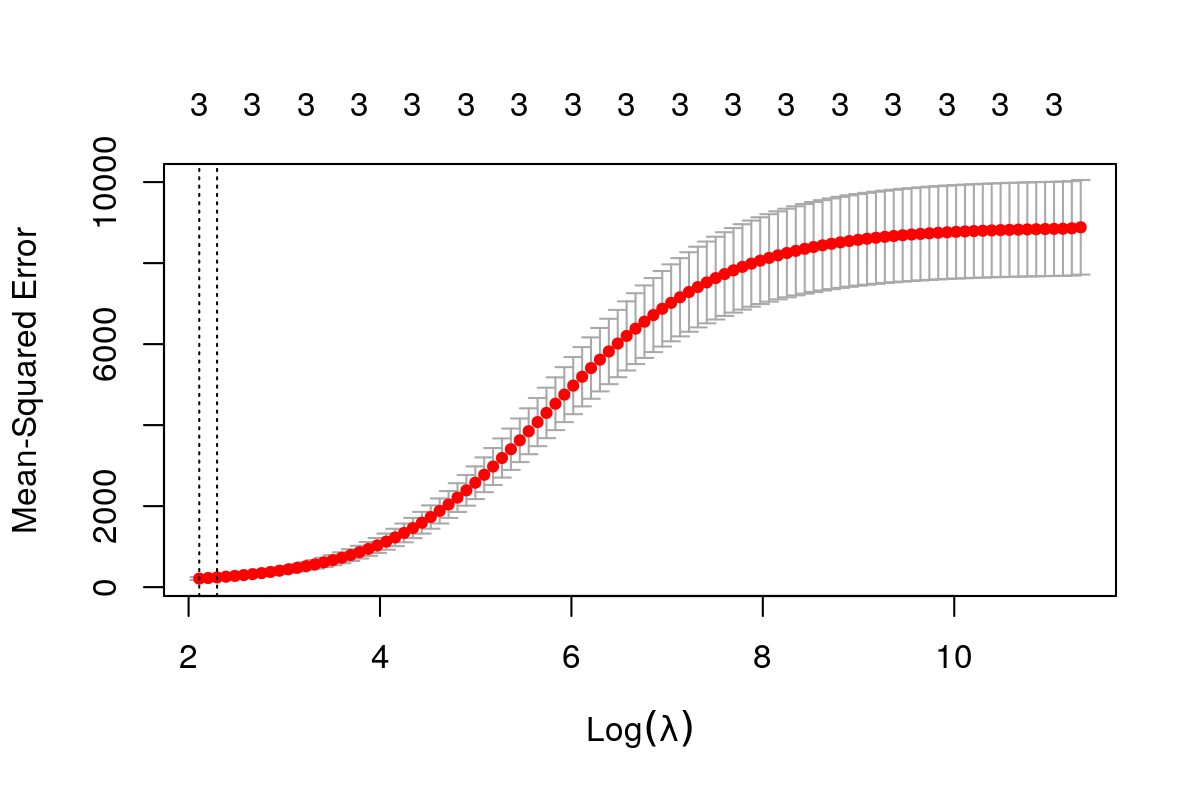

In [56]:
cvfit<-cv.glmnet(as.matrix(df[,c('x1','x2','x3')]),as.matrix(df[,'y']),nfolds=10,alpha=0)
plot(cvfit)

El modelo que tiene un error cuadrático medio más bajo aparece en la variable *cvfit$lambda.min*

El modelo que tiene un mayor valor de $\lambda$ cuya varianza del error está dentro de 1 *desviación típica* del *mínimo* aparece en la variable *cvfit$lambda.1se*. 

Al hacer cross-validation el MSE no será un valor único sino que tendremos *nfolds* diferentes. De todos estos MSE podemos calular la *media* y la *desviación típica*. El valor de *lambda.1se* viene a significar como el modelo más sencillo ($\lambda$ más alto) que no se diferencia considerablemente del *mínimo*.

In [57]:
cvfit$lambda.min
cvfit$lambda.1se

[1] 8.260002

[1] 9.949202

In [58]:
coef(cvfit, s = "lambda.1se")

4 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept)  0.4314165
x1           2.8179555
x2          -4.4662951
x3           3.0413342

### Prediciendo la dureza del hormigón con regularización

Resumen: El hormigón es el material más importante en la ingeniería civil. La resistencia a la compresión del hormigón es una función altamente no lineal de la edad y ingredientes Estos ingredientes incluyen cemento, escoria de alto horno, cenizas volantes, agua, superplastificante, agregado grueso y agregado fino.

Fuente:
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

In [59]:
concrete<-read.csv("data/Concrete_Data.csv",
                   col.names=c("cemento","escoria","cenizas","agua","plastificante","aggrueso","agfino","edad","resistencia"))
head(concrete)

,cemento,escoria,cenizas,agua,plastificante,aggrueso,agfino,edad,resistencia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,540.0,0.0,0,162,2.5,1040.0,676.0,28,79.99
2,540.0,0.0,0,162,2.5,1055.0,676.0,28,61.89
3,332.5,142.5,0,228,0.0,932.0,594.0,270,40.27
4,332.5,142.5,0,228,0.0,932.0,594.0,365,41.05
5,198.6,132.4,0,192,0.0,978.4,825.5,360,44.30
6,266.0,114.0,0,228,0.0,932.0,670.0,90,47.03


In [60]:
set.seed(12)



In [61]:
N=3
X<-model.matrix(lm(resistencia~
       poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
       poly(agua,N)*poly(plastificante,N)+
       poly(aggrueso,N)*poly(agfino,N)+
       poly(edad,N),data = concrete))
y<-concrete$resistencia

idx<-sample(1:nrow(concrete),nrow(concrete)*0.7)

# Con esto creamos la matrix X e Y que contiene las relaciones polinómicas entre las diferentes variables
X_train=X[idx,]
X_test=X[-idx,]
y_train=y[idx]
y_test=y[-idx]

# También podríamos haber usado la librería
# library(glmnetUtils)

In [62]:
gmodel<-glmnet(X_train,y_train,lambda=1,alpha=1)

In [63]:
coefficients(gmodel)

98 x 1 sparse Matrix of class "dgCMatrix"
                                                                s0
(Intercept)                                              35.831847
(Intercept)                                               .       
poly(cemento, N)1                                       255.783948
poly(cemento, N)2                                         .       
poly(cemento, N)3                                         .       
poly(escoria, N)1                                       126.650719
poly(escoria, N)2                                        -1.588042
poly(escoria, N)3                                         .       
poly(cenizas, N)1                                         .       
poly(cenizas, N)2                                         .       
poly(cenizas, N)3                                         .       
poly(agua, N)1                                          -80.014935
poly(agua, N)2                                            .       
poly(agua, N)3      

[1] "El valor lambda con el menor error es:0.152726015498415"

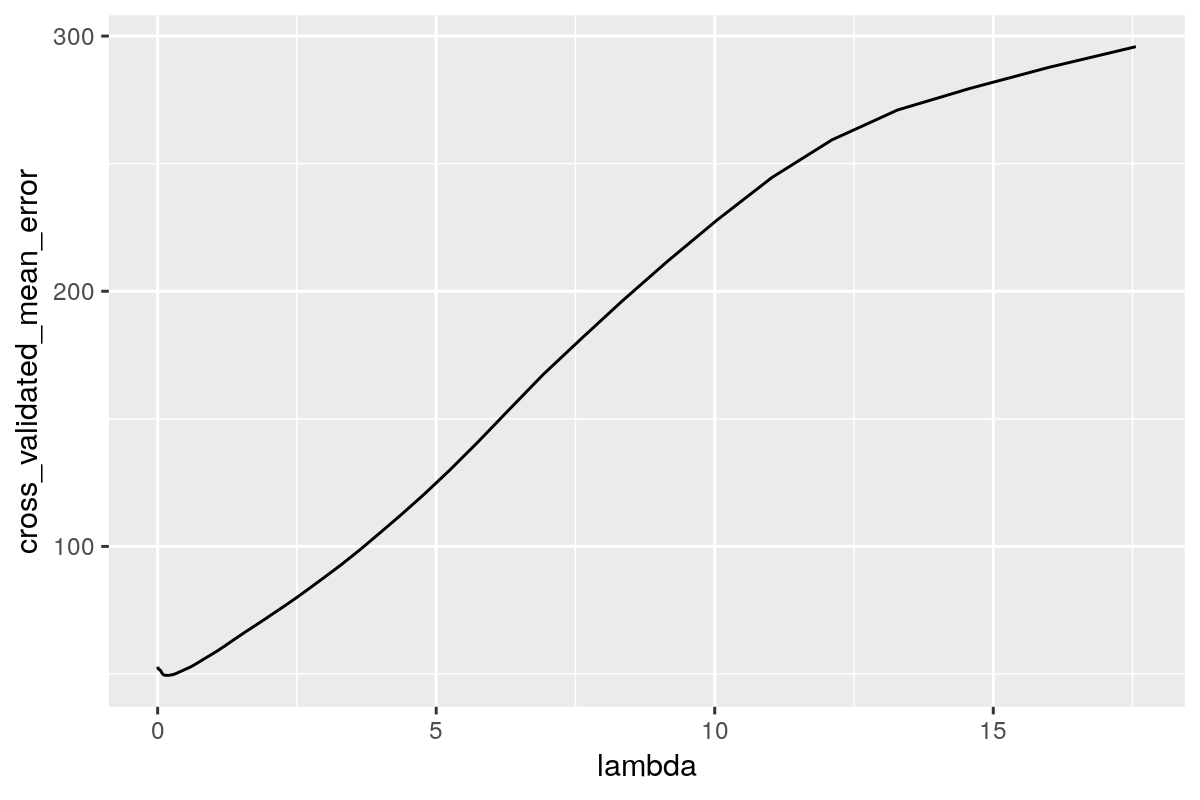

In [64]:
cv<-cv.glmnet(X_train,y_train,alpha=0.5)
ggplot(data.frame(lambda=cv$lambda,cross_validated_mean_error=cv$cvm),
       aes(x=lambda,y=cross_validated_mean_error))+geom_line()
paste0("El valor lambda con el menor error es:",cv$lambda.min)

[1] "R^2 del modelo sobre conjunto de testing: 0.776973431834981"

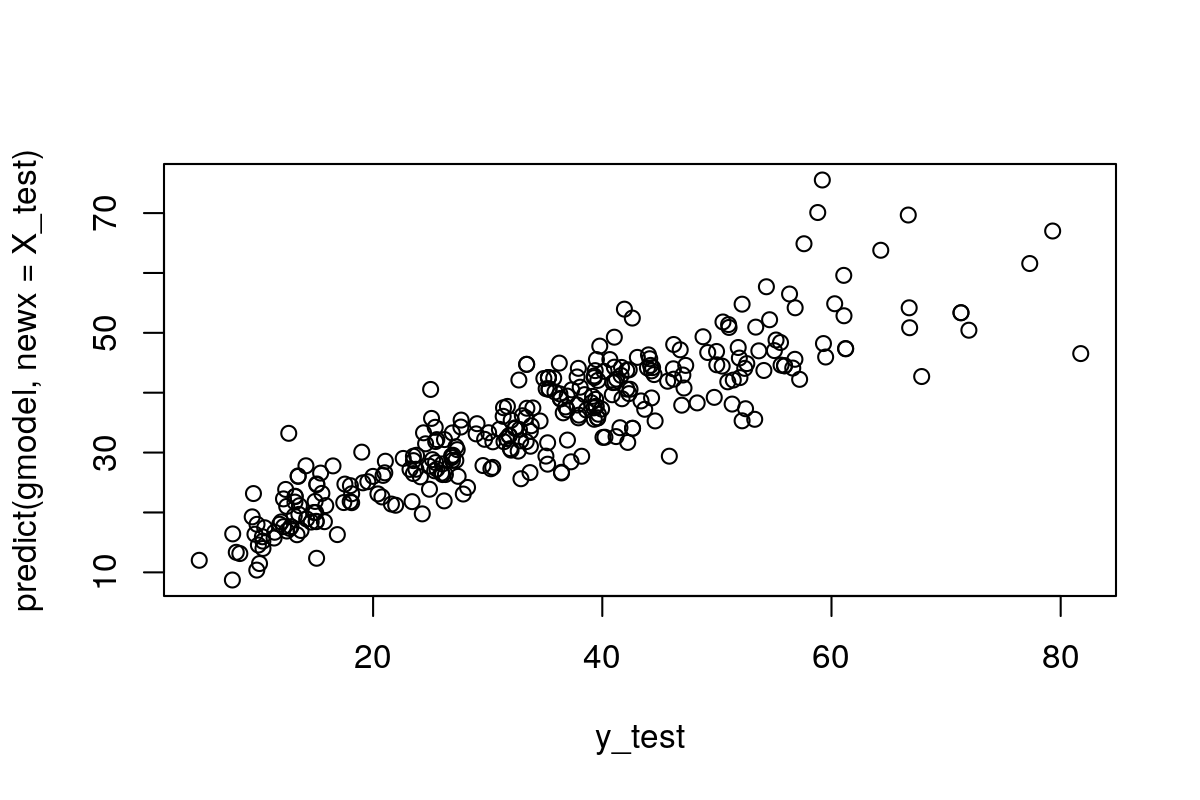

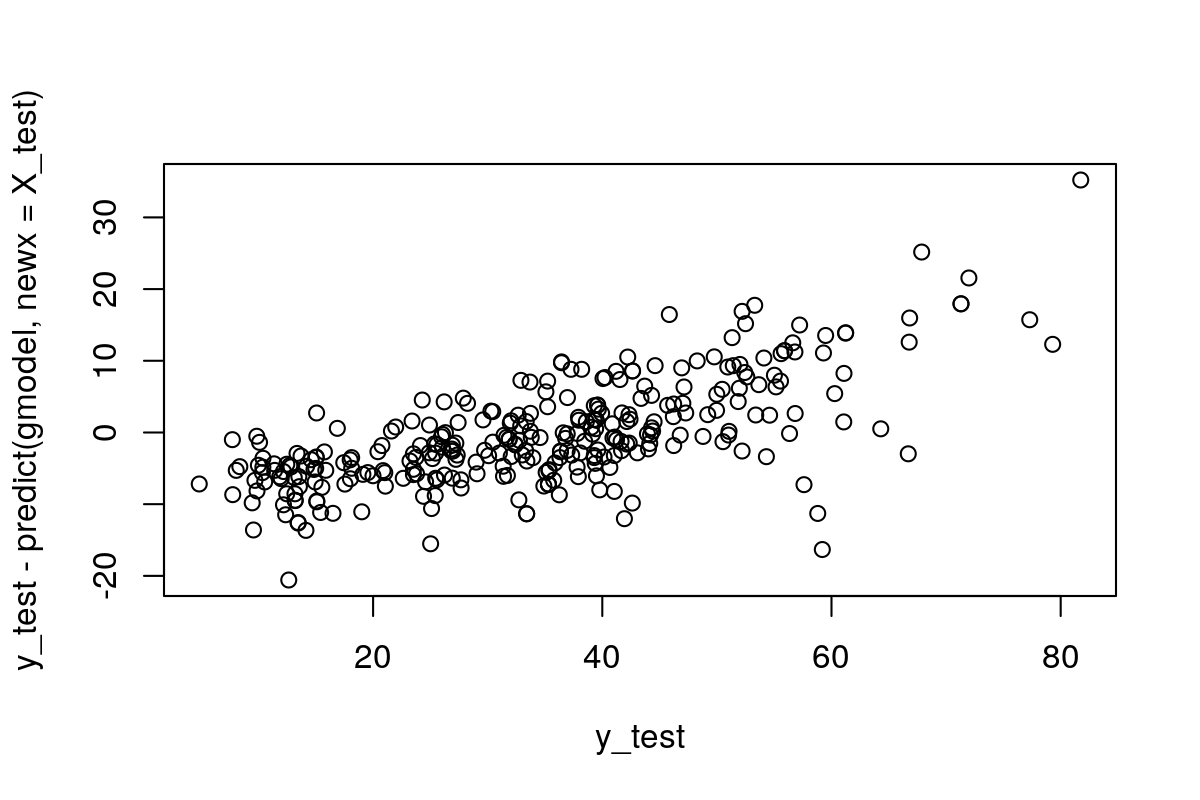

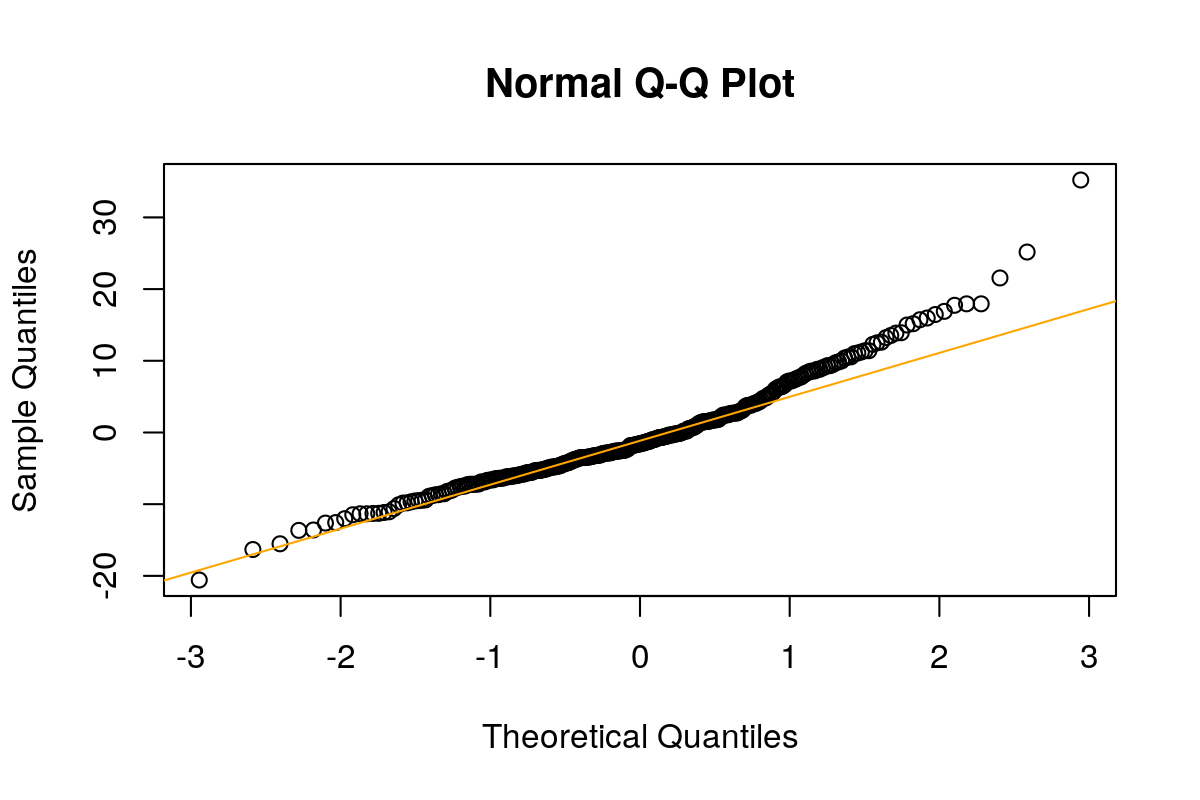

In [65]:
paste("R^2 del modelo sobre conjunto de testing:",myrsquared(y_test,predict(gmodel,newx=X_test)))
plot(y_test,predict(gmodel,newx=X_test))
plot(y_test,y_test-predict(gmodel,newx=X_test))
qqnorm(y_test-predict(gmodel,newx=X_test))
qqline(y_test-predict(gmodel,newx=X_test),col="orange")

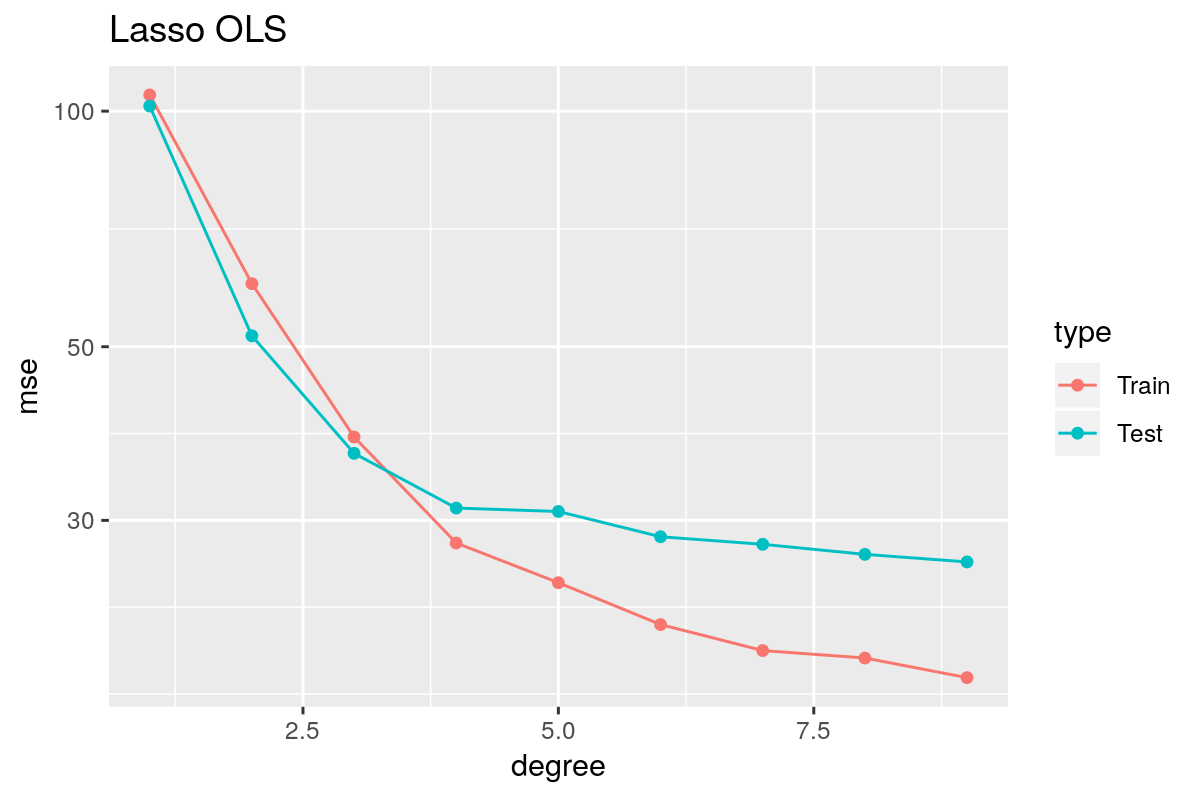

In [66]:
calcmse<-function(y_real,y_est){
  sum((y_real-y_est)^2,na.rm = T)/length(y_real)
}

l<-0.0548076400958839
mse_train<-c()
mse_test<-c()
for (N in 1:9){
    
    
    X<-model.matrix(lm(resistencia~
           poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
           poly(agua,N)*poly(plastificante,N)+
           poly(aggrueso,N)*poly(agfino,N)+
           poly(edad,N),data = concrete))
    y<-concrete$resistencia
        
    X_train=X[idx,]
    X_test=X[-idx,]
    y_train=y[idx]
    y_test=y[-idx]
    
    
    
    gmodel<-glmnet(X_train,y_train,lambda=l,alpha=1)
    
    yp_train<-predict(gmodel,newx=X_train)
    mse_train[N]<-calcmse(y_train,yp_train)
  
    yp_test<-predict(gmodel,newx=X_test)
    mse_test[N] <-calcmse(y_test,yp_test)
    
}
mse.df_lasso<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df_lasso<-rbind(mse.df_lasso,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))

library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(mse.df_lasso,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()+scale_y_log10()+ggtitle("Lasso OLS")

Warning message:
“Removed 4 rows containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


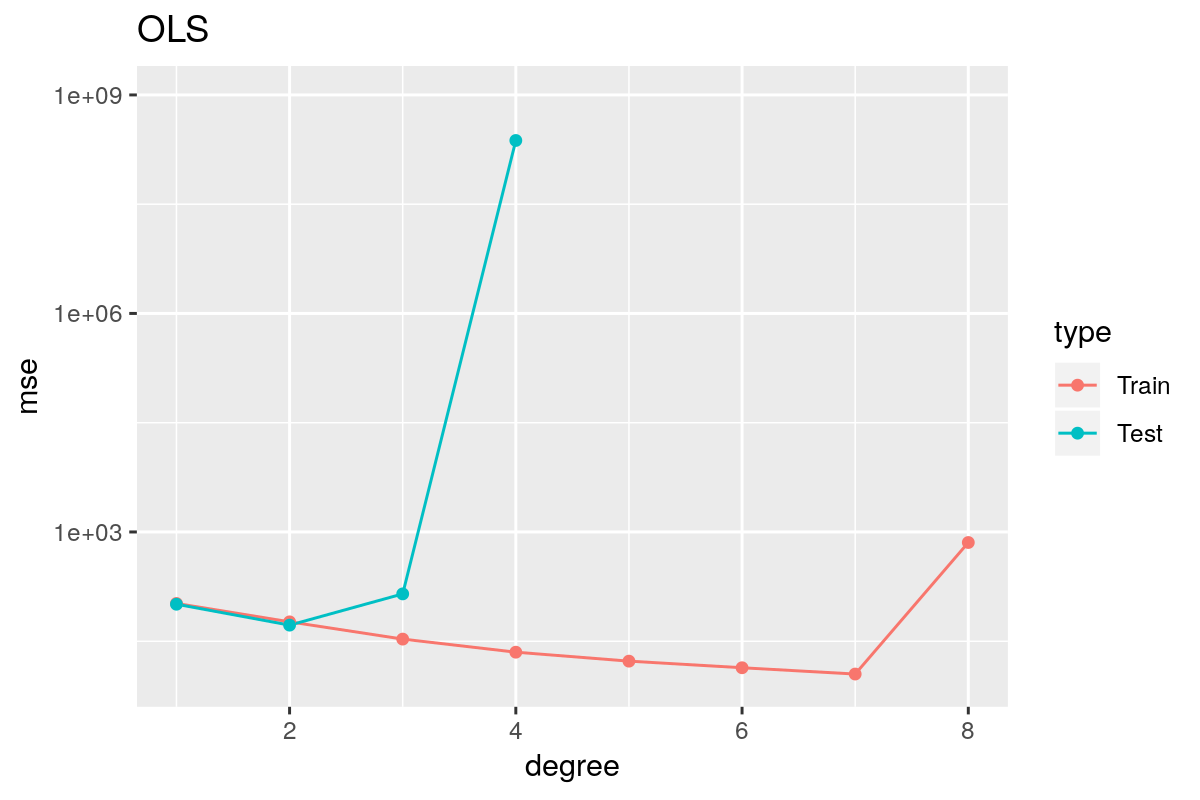

In [67]:
#Comparamos con el OLS original sin regularizar
ggplot(mse.df,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()+
scale_y_log10(limits=c(10,1000000000))+ggtitle("OLS")


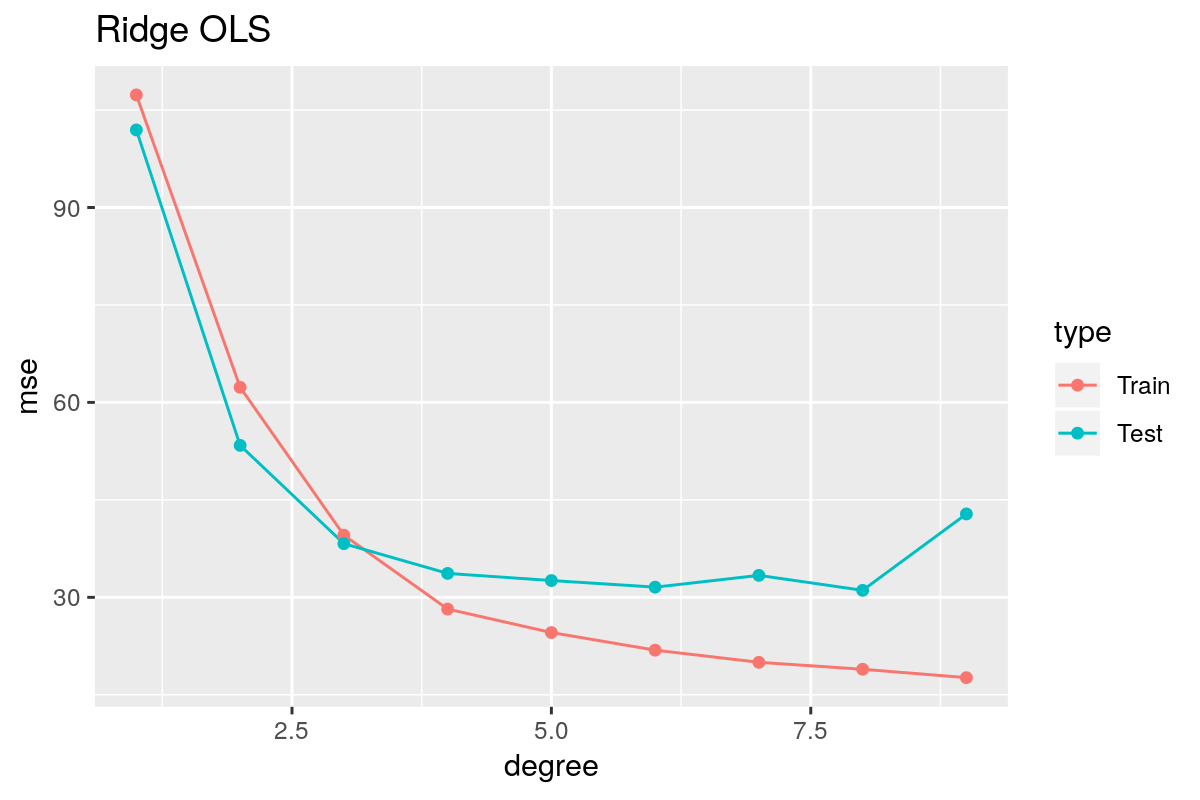

In [68]:
mse_train<-c()
mse_test<-c()

l<-1
for (N in 1:9){
    
    
    X<-model.matrix(lm(resistencia~
           poly(cemento,N)*poly(escoria,N)*poly(cenizas,N)+
           poly(agua,N)*poly(plastificante,N)+
           poly(aggrueso,N)*poly(agfino,N)+
           poly(edad,N),data = concrete))
    y<-concrete$resistencia
        
    X_train=X[idx,]
    X_test=X[-idx,]
    y_train=y[idx]
    y_test=y[-idx]
    
    
    
    gmodel<-glmnet(X_train,y_train,lambda=l,alpha=0)
    
    yp_train<-predict(gmodel,newx=X_train)
    mse_train[N]<-calcmse(y_train,yp_train)
  
    yp_test<-predict(gmodel,newx=X_test)
    mse_test[N] <-calcmse(y_test,yp_test)
    
}
mse.df_ridge<-data.frame(degree=1:length(mse_train),mse=mse_train,type="Train")
mse.df_ridge<-rbind(mse.df_ridge,data.frame(degree=1:length(mse_train),mse=mse_test,type="Test"))

library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

ggplot(mse.df_ridge,aes(x=degree,y=mse,color=type))+geom_line()+geom_point()+ggtitle("Ridge OLS")

## Variables categóricas

Variables categóricas son aquellas que no presentan un valor de un número real sino una categoría, es decir pueden tomar un valor dentro de un conjutno fijo y limitado de posible valores, con o sin orden. Ejemplo:
* Variables binarias: Si/No
* Categóricas con orden: nada/poco/normal/mucho.
* Categóricas sin orden: rojo/verde/azul

Antes de utilizar una de estas variables en un algoritmo de aprendizaje hay que convertirlo a un número real, es necesario **coficarlo** para que el algoritmo correspondiente lo interprete correctamente.

#### Ejemplo peso de niños/niñas en función de la edad y del peso

Queremos un modelo completo para calcular la longitud de un bebé en función de su edad en dias y su peso en kg.

In [69]:
set.seed(123)
boys<-read.csv("data/lhfa_boys_p_exp.txt",sep="")
boys$gender<-"boy"
girls<-read.csv("data/lhfa_girls_p_exp.txt",sep="")
girls$gender<-"girl"
height<-rbind(boys,girls)
height["s_height"]<-((height$P25-height$M)/qnorm(0.25)+(height$P75-height$M)/qnorm(0.75))/2
height<-height[,c("gender","Day","M","s_height")]
colnames(height)<-c("gender","day","height","s_height")

boys<-read.csv("data/wfa_boys_p_exp.txt",sep="")
boys$gender<-"boy"
girls<-read.csv("data/wfa_girls_p_exp.txt",sep="")
girls$gender<-"girl"
weight<-rbind(boys,girls)
weight["s_weight"]<-((weight$P25-weight$M)/qnorm(0.25)+(weight$P75-weight$M)/qnorm(0.75))/2
weight<-weight[,c("gender","Age","M","s_weight")]
colnames(weight)<-c("gender","day","weight","s_weight")



hw<-merge(height,weight,by=c("gender","day"))
n <- 20
hw<-do.call("rbind", replicate(n, hw, simplify = FALSE))
sample_data=data.frame(gender=hw$gender,
                   day=hw$day,
                   height=apply(hw[,c("height","s_height")],1,function(x){rnorm(1,mean=x["height"],sd=x["s_height"])}),
                   weight=apply(hw[,c("weight","s_weight")],1,function(x){rnorm(1,mean=x["weight"],sd=x["s_weight"])}))
idx<-sample(1:nrow(sample_data),200)
sample_data<-sample_data[idx,]
write.csv(sample_data,file="data/weight_babys.csv",row.names = FALSE)

In [70]:
df_weight_height=read.csv("data/weight_babys.csv")
head(df_weight_height)

,gender,day,height,weight
,<fct>,<int>,<dbl>,<dbl>
1,girl,1079,95.48602,13.171765
2,boy,1662,106.66612,17.591256
3,boy,175,66.62338,8.731773
4,boy,1646,109.82951,19.583067
5,girl,1772,109.26331,21.579168
6,girl,1003,96.84478,11.761331


Exploramos como se relacionan las variables entre sí, analizándo niños y niñas por separado.
Se ve una alta correlación entre peso, altura y edad.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



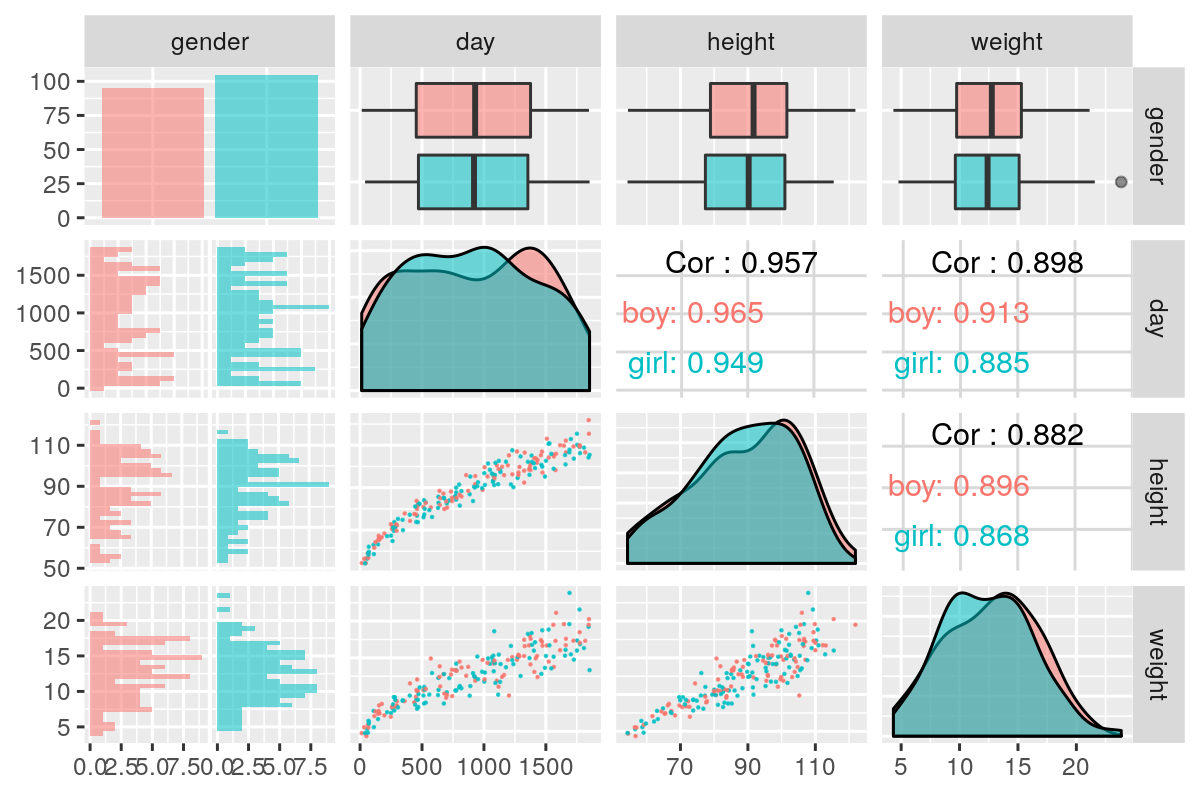

In [71]:
library(GGally)
options(repr.plot.height=4,repr.plot.width=6)

ggpairs(df_weight_height,ggplot2::aes(colour=gender,alpha=0.5),
       lower = list(continuous = wrap("points", alpha = 0.8,size=0.1))
                  )

Como queremos hacer un modelo predictivo vamos a dividir los datos entre test y training:

In [72]:
set.seed(123)
idx<-sample(1:nrow(df_weight_height),nrow(df_weight_height)*0.7)
train.df<-df_weight_height[idx,]
test.df<-df_weight_height[-idx,]

Calculemos para la formula:
\\[
height = \beta_0 + \beta_1·day + \beta_2·gender
\\]
Donde *gender* es una variable categórica que traducirá a dos valores:
* Boy  - 0
* Girl - 1

In [73]:
model<-lm(data=train.df,formula=height~day+gender)
summary(model)


Call:
lm(formula = height ~ day + gender, data = train.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1152  -2.8007   0.0805   3.5784  10.0219 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 63.2007484  0.8666949  72.922   <2e-16 ***
day          0.0283134  0.0007393  38.296   <2e-16 ***
gendergirl  -1.0691758  0.7942038  -1.346     0.18    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.675 on 137 degrees of freedom
Multiple R-squared:  0.9146,	Adjusted R-squared:  0.9134 
F-statistic: 733.9 on 2 and 137 DF,  p-value: < 2.2e-16


A igual número de días una niña pesará, aproximadamente, en media 1.07 kg menos.

Pero si miramos al intervalo de confianza del coeficiente asociado al género es muy amplio, llegando a ser incluso positivo:

In [74]:
confint(model)

,2.5 %,97.5 %
(Intercept),61.48691887,64.91457799
day,0.02685145,0.02977543
gendergirl,-2.63965925,0.50130757


Podemos ver las figuras de calidad de la predicción:
\\[
RMS = \sqrt{\frac{\sum (y_i - \hat{y}_i)^2}{N}}
\\]
\\[
R^2 = 1-\frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
\\]
\\[
MAE = \frac{\sum | y_i - \hat{y}_i | }{N}
\\]

In [75]:
library(caret)
print("Training:")
train.df$pred <-  predict(model,train.df)
postResample(train.df$pred,obs = train.df$height)
print("Testing:")
test.df$pred <-  predict(model,test.df)
postResample(test.df$pred,obs = test.df$height)

Loading required package: lattice



[1] "Training:"


RMSE  Rsquared       MAE 
4.6246035 0.9146361 3.7407511

[1] "Testing:"


RMSE  Rsquared       MAE 
4.2239352 0.9173109 3.3127037

Ahora vamos a intentar otro modelo:
\\[
height = \beta_0 + \beta_1·day·(gender==boy) + \beta_2·day·(gender==girl) \\
height = \beta_0 + \beta_1·day·(1-gender) + \beta_2·day·(gender)        
\\]
Donde *gender* es una variable categórica que traducirá a dos valores:
* Boy  - 0
* Girl - 1

Por lo tanto:
* $\beta_1$ nos dirá cuantos cm crece cada día un niño
* $\beta_2$ nos dirá cuantos cm crece cada día una niña

In [76]:
model<-lm(data=train.df,formula=height~day:gender)
summary(model)


Call:
lm(formula = height ~ day:gender, data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.429  -2.881   0.110   3.566  10.293 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    62.604255   0.743537   84.20   <2e-16 ***
day:genderboy   0.029221   0.000852   34.30   <2e-16 ***
day:gendergirl  0.027593   0.000808   34.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.632 on 137 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.915 
F-statistic: 748.9 on 2 and 137 DF,  p-value: < 2.2e-16


In [77]:
library(caret)
print("Training:")
train.df$pred <-  predict(model,train.df)
postResample(train.df$pred,obs = train.df$height)
print("Testing:")
test.df$pred <-  predict(model,test.df)
postResample(test.df$pred,obs = test.df$height)

[1] "Training:"


RMSE  Rsquared       MAE 
4.5821097 0.9161977 3.7272938

[1] "Testing:"


RMSE  Rsquared       MAE 
4.3209229 0.9149775 3.3997308

In [78]:
confint(model)

,2.5 %,97.5 %
(Intercept),61.13396201,64.07454708
day:genderboy,0.02753615,0.03090550
day:gendergirl,0.02599558,0.02919112


Por último podríamos pensar en el modelo:
\\[
height = \beta_0 +\beta_1·day + \beta_2·day·(gender==girl)+ \beta_3·(gender==girl) \\
height = \beta_0 + \beta_1·day + \beta_2·day·(gender)+ \beta_3·gender
\\]
Donde *gender* es una variable categórica que traducirá a dos valores:
* Boy  - 0
* Girl - 1

Por lo tanto:
* $\beta_0$ cuanto mide de media un niño al nacer
* $\beta_1$ nos dirá cuantos cm crece cada día un niño
* $\beta_2$ nos dirá cuantos cm crece cada día una niña en exceso sobre un niño
* $\beta_3$ nos dirá cuantos cm de más mide una niña al nacer respecto un niño

In [79]:
model<-lm(data=train.df,formula=height~day*gender)
#model<-lm(data=train.df,formula=height~day:gender+day+gender)
summary(model)


Call:
lm(formula = height ~ day * gender, data = train.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6485  -3.0527   0.2079   3.5566  10.2182 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    61.937305   1.112991  55.649   <2e-16 ***
day             0.029783   0.001102  27.038   <2e-16 ***
gendergirl      1.207014   1.497273   0.806    0.422    
day:gendergirl -0.002640   0.001476  -1.788    0.076 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.638 on 136 degrees of freedom
Multiple R-squared:  0.9166,	Adjusted R-squared:  0.9148 
F-statistic: 498.2 on 3 and 136 DF,  p-value: < 2.2e-16


In [80]:
confint(model)

,2.5 %,97.5 %
(Intercept),59.736297690,6.413831e+01
day,0.027604303,3.196092e-02
gendergirl,-1.753935278,4.167963e+00
day:gendergirl,-0.005559352,2.802011e-04


## Codificación de variables categóricas

### One-hot

Se crean N columnas nuevas, tantas como posibles valores tenga la variable categórica.
Se asigna un valor de 1 a la variable que tiene ese valor 0 en caso contrario.


|-|col1|col2|col3|col4|
|-|:--:| -----:|--|--|
|categoria1|1|0|0|0|
|categoria2|0|1|0|0|
|categoria3|0|0|1|0|
|categoria4|0|0|0|1|

In [81]:
df_new_econding<-df_weight_height
df_new_econding$boy<-ifelse(df_new_econding$gender=="boy",1,0)
df_new_econding$girl<-ifelse(df_new_econding$gender=="girl",1,0)
df_new_econding$gender<-NULL
set.seed(123)
idx<-sample(1:nrow(df_new_econding),nrow(df_new_econding)*0.7)
train.df<-df_new_econding[idx,]
test.df<-df_new_econding[-idx,]

In [82]:
head(train.df)

,day,height,weight,boy,girl
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
159,115,61.69181,7.063859,1,0
179,1355,102.24834,18.256696,0,1
14,818,88.38173,10.859407,0,1
195,741,85.26628,13.393031,1,0
170,1523,104.22974,14.486120,1,0
50,1163,95.89462,12.668591,1,0


In [83]:
model<-lm(data=train.df,formula=height~day:boy+day:girl)
summary(model)


Call:
lm(formula = height ~ day:boy + day:girl, data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.429  -2.881   0.110   3.566  10.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 62.604255   0.743537   84.20   <2e-16 ***
day:boy      0.029221   0.000852   34.30   <2e-16 ***
day:girl     0.027593   0.000808   34.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.632 on 137 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.915 
F-statistic: 748.9 on 2 and 137 DF,  p-value: < 2.2e-16


### Dummy

Se crean N-1 columnas nuevas, tantas como posibles valores tenga la variable categórica menos una.
para una categoría en la que todos los valores serán 0, esa catergoría será usada como base del modelo.
Al resto de columnas se le asigna un valor de 1 a la variable que tiene ese valor 0 en caso contrario. 

|-|col1|col2|col3|
|-|:--:| -----:|--|
|categoria1|0|0|0|
|categoria2|1|0|0|
|categoria3|0|1|0|
|categoria4|0|0|1|


In [84]:
df_new_econding<-df_weight_height
df_new_econding$girl<-ifelse(df_new_econding$gender=="girl",1,0)
df_new_econding$gender<-NULL
set.seed(123)
idx<-sample(1:nrow(df_new_econding),nrow(df_new_econding)*0.7)
train.df<-df_new_econding[idx,]
test.df<-df_new_econding[-idx,]

In [85]:
model<-lm(data=train.df,formula=height~day+day:girl)
summary(model)


Call:
lm(formula = height ~ day + day:girl, data = train.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.429  -2.881   0.110   3.566  10.293 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 62.604255   0.743537  84.198   <2e-16 ***
day          0.029221   0.000852  34.299   <2e-16 ***
day:girl    -0.001628   0.000776  -2.097   0.0378 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.632 on 137 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.915 
F-statistic: 748.9 on 2 and 137 DF,  p-value: < 2.2e-16


In [ ]:
paste("El coeficiente final para las niñas es:",model$coefficients[2]+model$coefficients[3])

La ecuación equivalente sería:
\\[
height = \beta_0 + \beta_1·day + \beta_2·day·girl \\
height = \beta_0 + (\beta_1+\beta_2·girl)·day
\\]

### Ortogonal de polinomios

La codificación ortogonal de polinomios es una forma de análisis de tendencias en el sentido de que busca tendencias lineales, cuadráticas, cúbicas, grado-n, etc.. en la variable categórica. Este tipo de sistema de codificación debe usarse solo con una variable ordinal en la que los niveles están equiespaciados. 

|-| .L|.Q|.C|
|-|:--:| -----:|--|
|categoria1| -0.6708204 |  0.5 | -0.2236068 |
|categoria2| -0.2236068 | -0.5 | 0.6708204 |
|categoria3|  0.2236068 | -0.5 | -0.6708204|
|categoria4|  0.6708204 |  0.5 | 0.2236068|



### Codificación Helmert

La codificación Helmert compara cada nivel de una variable categórica con la media de los niveles subsiguientes. Por lo tanto, el primer contraste compara la media de la variable dependiente para el nivel 1 con la media de todos los niveles posteriores (niveles 2, 3 y 4), el segundo contraste compara la media de la variable dependiente para el nivel 2  con la media de todos los niveles posteriores (niveles 3 y 4), y el tercer contraste compara la media de la variable dependiente para el nivel 3  con la media de todos los niveles posteriores (nivel 4).

|-|col1|col2|col3|
|-|:--:| -----:|--|
|categoria1|-1|-1|-1|
|categoria2|1|-1|-1|
|categoria3|0|2|-1|
|categoria4|0|0|3|

### Ejemplo 
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

    Food - refers to the total amount of the food item available as human food during the reference period.
    Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.

https://www.kaggle.com/dorbicycle/world-foodfeed-production


In [86]:
fao=read.csv('./data/FAO.csv')
head(fao)

,Area.Abbreviation,Area.Code,Area,Item.Code,Item,Element.Code,Element,Unit,latitude,longitude,⋯,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,⋯,3249,3486,3704,4164,4252,4538,4605,4711,4810,4895
2,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,⋯,419,445,546,455,490,415,442,476,425,422
3,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,⋯,58,236,262,263,230,379,315,203,367,360
4,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,⋯,185,43,44,48,62,55,60,72,78,89
5,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,⋯,120,208,233,249,247,195,178,191,200,200
6,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,⋯,231,67,82,67,69,71,82,73,77,76


In [87]:
fao=fao[c(3,5,7,11:63)]
head(fao)

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,⋯,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,Wheat and products,Food,1928,1904,1666,1950,2001,1808,2053,⋯,3249,3486,3704,4164,4252,4538,4605,4711,4810,4895
2,Afghanistan,Rice (Milled Equivalent),Food,183,183,182,220,220,195,231,⋯,419,445,546,455,490,415,442,476,425,422
3,Afghanistan,Barley and products,Feed,76,76,76,76,76,75,71,⋯,58,236,262,263,230,379,315,203,367,360
4,Afghanistan,Barley and products,Food,237,237,237,238,238,237,225,⋯,185,43,44,48,62,55,60,72,78,89
5,Afghanistan,Maize and products,Feed,210,210,214,216,216,216,235,⋯,120,208,233,249,247,195,178,191,200,200
6,Afghanistan,Maize and products,Food,403,403,410,415,415,413,454,⋯,231,67,82,67,69,71,82,73,77,76


In [88]:
levels(fao$Item)[levels(fao$Item)=="Wheat and products"] <- "Wheat"
levels(fao$Item)[levels(fao$Item)=="Barley and products"]<-"Barley"
levels(fao$Item)[levels(fao$Item)=="Rice (Milled Equivalent)"]<-"Rice"
levels(fao$Item)[levels(fao$Item)=="Maize and products"]<-"Maize"
items<-c("Wheat","Rice","Barley","Maize")
fao<-fao[fao$Item %in% items,]
fao$Item<-droplevels(fao$Item)
head(fao)

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,⋯,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Afghanistan,Wheat,Food,1928,1904,1666,1950,2001,1808,2053,⋯,3249,3486,3704,4164,4252,4538,4605,4711,4810,4895
2,Afghanistan,Rice,Food,183,183,182,220,220,195,231,⋯,419,445,546,455,490,415,442,476,425,422
3,Afghanistan,Barley,Feed,76,76,76,76,76,75,71,⋯,58,236,262,263,230,379,315,203,367,360
4,Afghanistan,Barley,Food,237,237,237,238,238,237,225,⋯,185,43,44,48,62,55,60,72,78,89
5,Afghanistan,Maize,Feed,210,210,214,216,216,216,235,⋯,120,208,233,249,247,195,178,191,200,200
6,Afghanistan,Maize,Food,403,403,410,415,415,413,454,⋯,231,67,82,67,69,71,82,73,77,76


In [89]:
library(reshape2)
fao=melt(fao,id.vars=c("Area","Item","Element"))
head(fao)

,Area,Item,Element,variable,value
,<fct>,<fct>,<fct>,<fct>,<int>
1,Afghanistan,Wheat,Food,Y1961,1928
2,Afghanistan,Rice,Food,Y1961,183
3,Afghanistan,Barley,Feed,Y1961,76
4,Afghanistan,Barley,Food,Y1961,237
5,Afghanistan,Maize,Feed,Y1961,210
6,Afghanistan,Maize,Food,Y1961,403


In [90]:
fao$year<-as.numeric(substr(fao$variable,2,5))


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:GGally’:

    nasa


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




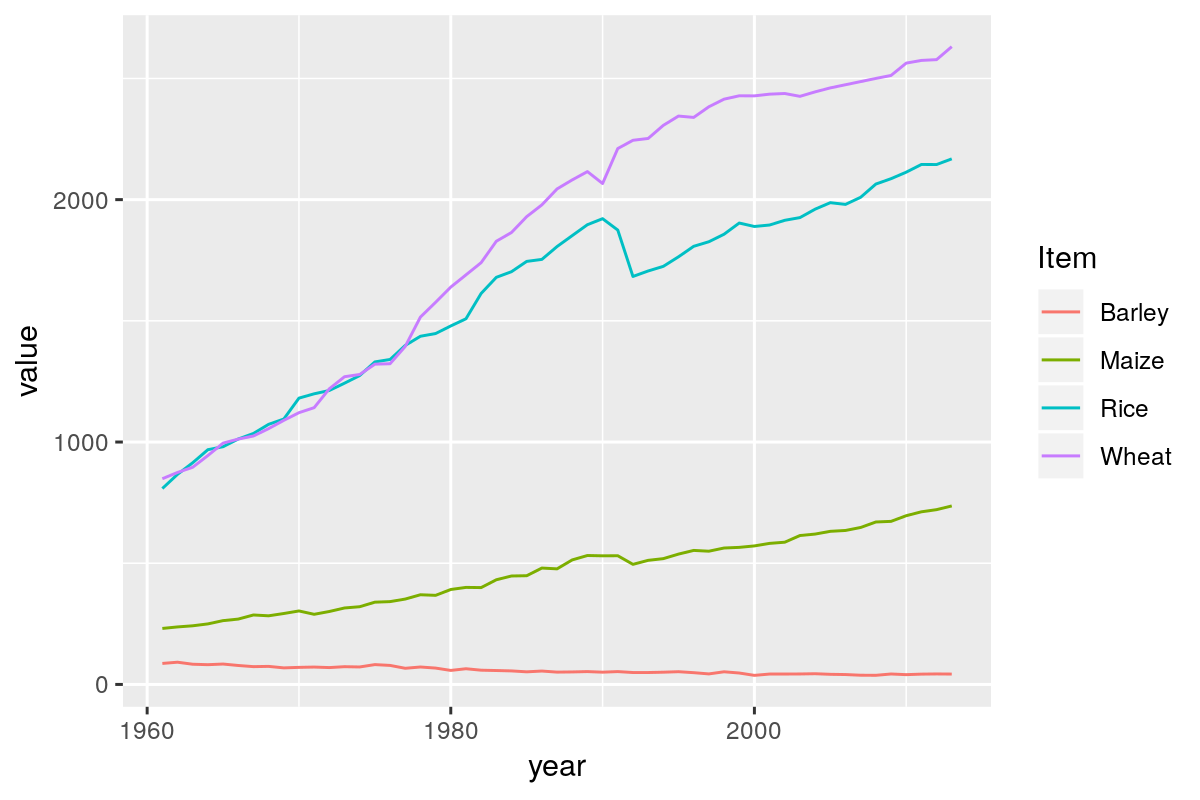

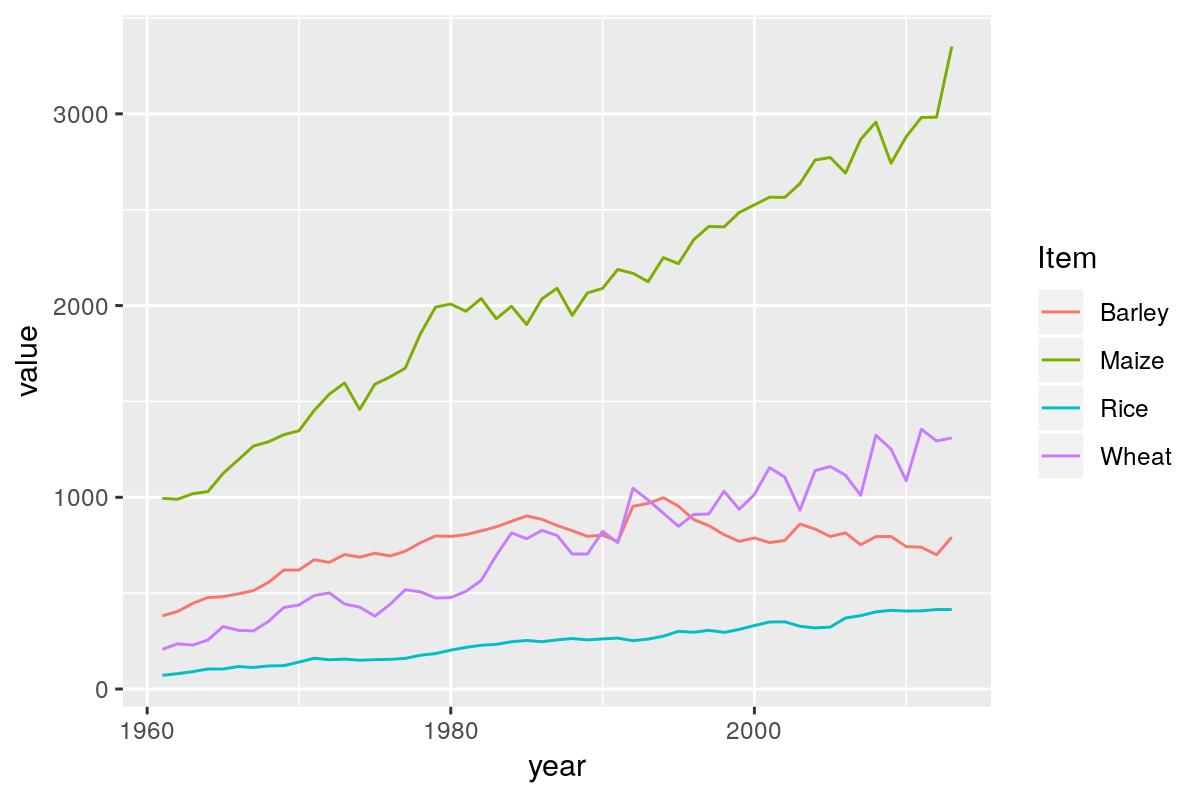

In [91]:
library(dplyr)
fao_sum<-fao %>% group_by(Item,Element,year) %>% summarise(value=mean(value,na.rm=T))

options(repr.plot.height=4,repr.plot.width=6)
library(ggplot2)
ggplot(subset(fao_sum,Element=="Food"),aes(x=year,y=value,color=Item))+geom_line()
ggplot(subset(fao_sum,Element=="Feed"),aes(x=year,y=value,color=Item))+geom_line()

In [92]:
model<-lm(data=fao,formula="value~year+Item+Element")
summary(model)


Call:
lm(formula = "value~year+Item+Element", data = fao)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -37257.797   3523.325 -10.575   <2e-16 ***
year            18.951      1.772  10.698   <2e-16 ***
ItemMaize      911.406     74.965  12.158   <2e-16 ***
ItemRice       867.701     80.024  10.843   <2e-16 ***
ItemWheat     1182.459     79.054  14.958   <2e-16 ***
ElementFood   -134.079     56.314  -2.381   0.0173 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


## Contrastes

Los "contrastes" definidos en el entorno R determinan como las variables categóricas son gestionadas en los modelos. El patrón más comun para los modelos es el "treatment contrasts", que es equivalente a una codificación dummy. Al primer nivel de la variable categórica es se le asigna el valor 0, y los otros niveles se miden a partir de este.

Como ya habíamos visto, por defecto R utiliza una coficación Dummy de variables categóricas.

El nivel de referencia se elije al que tiene el nivel (level) más bajo:

In [93]:
levels(fao$Item)

[1] "Barley" "Maize"  "Rice"   "Wheat"

In [94]:
contrasts(fao$Item)

,Maize,Rice,Wheat
Barley,0,0,0
Maize,1,0,0
Rice,0,1,0
Wheat,0,0,1


Podemos cambiar el nivel de referencia con la función `cont.trearment` , por ejemplo seleccionamos el Trigo:

In [95]:
ctr<-contr.treatment(4, base = 4)
colnames(ctr)<-c("Barley","Maize","Rice")
ctr

,Barley,Maize,Rice
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,0


In [96]:
contrasts(fao$Item)<-ctr

In [97]:
contrasts(fao$Item)

,Barley,Maize,Rice
Barley,1,0,0
Maize,0,1,0
Rice,0,0,1
Wheat,0,0,0


In [98]:
model<-lm(data=fao,formula="value~year+Item+Element")
summary(model)


Call:
lm(formula = "value~year+Item+Element", data = fao)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36075.339   3523.514 -10.238  < 2e-16 ***
year            18.951      1.772  10.698  < 2e-16 ***
ItemBarley   -1182.459     79.054 -14.958  < 2e-16 ***
ItemMaize     -271.052     75.682  -3.581 0.000342 ***
ItemRice      -314.758     80.215  -3.924 8.72e-05 ***
ElementFood   -134.079     56.314  -2.381 0.017273 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


Esto es equivalente a crear 3 columnas más llamadas ItemBarley, ItemMaize e ItemRice:

In [99]:
fao_dummy<-fao
fao_dummy$ItemBarley<-ifelse(fao_dummy$Item=="Barley",1,0)
fao_dummy$ItemMaize<-ifelse(fao_dummy$Item=="Maize",1,0)
fao_dummy$ItemRice<-ifelse(fao_dummy$Item=="Rice",1,0)
head(fao_dummy)

,Area,Item,Element,variable,value,year,ItemBarley,ItemMaize,ItemRice
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Wheat,Food,Y1961,1928,1961,0,0,0
2,Afghanistan,Rice,Food,Y1961,183,1961,0,0,1
3,Afghanistan,Barley,Feed,Y1961,76,1961,1,0,0
4,Afghanistan,Barley,Food,Y1961,237,1961,1,0,0
5,Afghanistan,Maize,Feed,Y1961,210,1961,0,1,0
6,Afghanistan,Maize,Food,Y1961,403,1961,0,1,0


In [100]:
model_dummy<-lm(data=fao_dummy,formula="value~year+Element+ItemBarley+ItemMaize+ItemRice")
summary(model_dummy)


Call:
lm(formula = "value~year+Element+ItemBarley+ItemMaize+ItemRice", 
    data = fao_dummy)

Residuals:
   Min     1Q Median     3Q    Max 
 -2074  -1282   -875   -284 154199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -36075.339   3523.514 -10.238  < 2e-16 ***
year            18.951      1.772  10.698  < 2e-16 ***
ElementFood   -134.079     56.314  -2.381 0.017273 *  
ItemBarley   -1182.459     79.054 -14.958  < 2e-16 ***
ItemMaize     -271.052     75.682  -3.581 0.000342 ***
ItemRice      -314.758     80.215  -3.924 8.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6305 on 53418 degrees of freedom
  (6837 observations deleted due to missingness)
Multiple R-squared:  0.006956,	Adjusted R-squared:  0.006863 
F-statistic: 74.84 on 5 and 53418 DF,  p-value: < 2.2e-16


####  Codificación polinómica


In [ ]:
ctr<-contr.poly(4)
ctr

In [ ]:
contrasts(fao$Item)<-ctr

In [ ]:
contrasts(fao$Item)

In [ ]:
model<-lm(data=fao,formula="value~year+Item+Element")
summary(model)